In [1]:
from google.colab import files
uploaded = files.upload()


Saving text.csv to text.csv


In [1]:

!pip uninstall -y scipy gensim
!pip install numpy==1.26.4
!pip install scipy==1.13.1 gensim==4.3.3 xgboost optuna wordcloud textblob seaborn

import nltk
nltk.download('punkt')
nltk.download('stopwords')

import numpy
import scipy
import gensim
import xgboost

print("✅ numpy:", numpy.__version__)
print("✅ scipy:", scipy.__version__)
print("✅ gensim:", gensim.__version__)
print("✅ xgboost:", xgboost.__version__)



Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ numpy: 1.26.4
✅ scipy: 1.13.1
✅ gensim: 4.3.3
✅ xgboost: 3.0.2


In [2]:
import pandas as pd

df = pd.read_csv("text.csv")
df.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
import gensim.downloader as api
from gensim.models import Word2Vec


In [4]:

import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image  # Image processing

# processing
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  # Common stop words
from nltk.stem import PorterStemmer  # Stemming words
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# text analysis
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.utils import resample


import optuna
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV  # Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold

# Word embeddings
import gensim.downloader as api
from gensim.models import Word2Vec

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn import metrics

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


import warnings
warnings.filterwarnings('ignore')
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## About the dataset

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [6]:
df.describe()


,Unnamed: 0,label
count,416809.000000,416809.000000
mean,208404.000000,1.554271
std,120322.538513,1.490453
min,0.000000,0.000000
25%,104202.000000,0.000000
50%,208404.000000,1.000000
75%,312606.000000,3.000000
max,416808.000000,5.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
def classes_plot(df):
  fig , ax = plt.subplots(figsize=(6,4))
  sns.countplot(x='label', data=df, color='cyan')
  plt.title("sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)")
  plt.show()

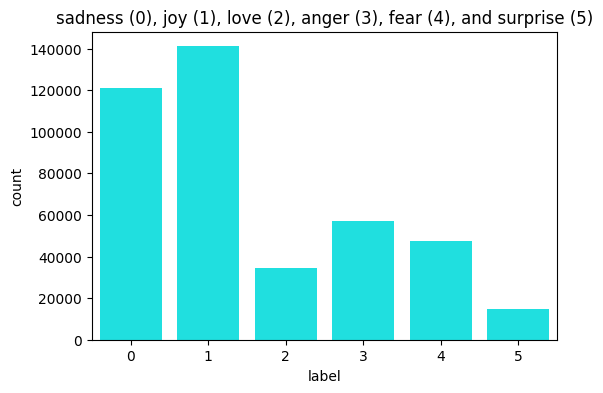

In [9]:
classes_plot(df)

# **As we can see the dataset is not balanced, so we use undersample technique to make the dataset balanced according to the smallest class (surprise)**

In [10]:
# Splitting the dataset to 3 different datasets as mentioned above
# Starting with the simple one - keeping the original dataset
original_df = df

In [11]:
from sklearn.utils import resample


Number of data for each class is: 7486


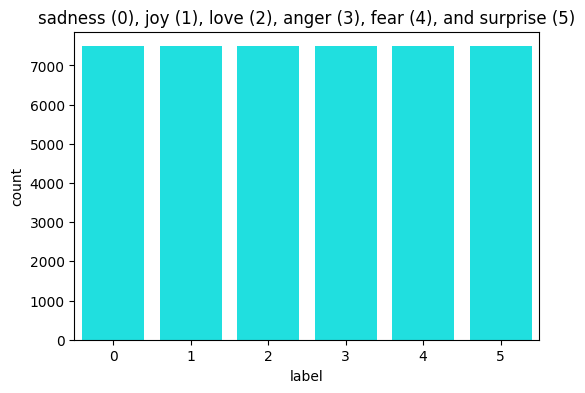

,Unnamed: 0,text,label
0,84526,i feel shaken up and torn down,4
1,227655,on reperbahn,3
2,339603,i feel insulted that he doesnt know me better ...,3
3,281246,i imagine that my fellow liberals get the same...,3
4,192230,i dont know why im writing it here and not tel...,3


In [12]:
# Now we will apply undersampling to the majority class to match class 5

# Separate the dataset by class
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_2 = df[df['label'] == 2]
df_3 = df[df['label'] == 3]
df_4 = df[df['label'] == 4]
df_5 = df[df['label'] == 5]

# Saving the amount of data in label 5
n_samples_label_5 = round(len(df_5) / 2)

# downsample the majority classes to n_samples_label_5 samples
df_0_downsampled = resample(df_0, replace=False, n_samples=n_samples_label_5, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=n_samples_label_5, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=n_samples_label_5, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=n_samples_label_5, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=n_samples_label_5, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=n_samples_label_5, random_state=42)

df_downsampled = pd.concat([df_1_downsampled, df_0_downsampled, df_3_downsampled, df_4_downsampled, df_2_downsampled, df_5_downsampled])

df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of data for each class is: {n_samples_label_5}")
classes_plot(df_downsampled)
df_downsampled.head()

In [14]:
def extract_href_sentence_lengths(df, text_column='text'):
    """
    Extracts the lengths of sentences that start with the words 'href', 'http' and 'www' in a given DataFrame column.

    Parameters:
    - df: DataFrame containing the data
    - text_column: Name of the column containing text data (default: 'text')

    Returns:
    - Lists of sentence lengths that start with 'href', 'http' and 'www'
    """
    href_sentence_lengths = []
    http_sentence_lengths = []
    www_sentence_lengths = []
    for text in df[text_column]:
        sentences = text.split(' ')
        for sentence in sentences:
            if sentence.lower().startswith('href'):
                href_sentence_lengths.append(len(text))
            elif sentence.lower().startswith('http'):
                http_sentence_lengths.append(len(text))
            elif sentence.lower().startswith('www'):
                www_sentence_lengths.append(len(text))
    return href_sentence_lengths, http_sentence_lengths, www_sentence_lengths

In [15]:
def plot_text_length_distribution(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Plots the distribution of text lengths by class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    df['text_length'] = df[text_column].apply(len)
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x='text_length', hue=label_column, multiple='stack', bins=30)
    plt.title(f"Distribution of Text Lengths by Class for '{df_name}' dataset")
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

In [16]:
def plot_word_clouds(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Generates word clouds for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    def plot_word_cloud(text, label):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(9, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for Label {label} in '{df_name}' dataset")
        plt.axis('off')
        plt.show()

    for label in df[label_column].unique():
        text = ' '.join(df[df[label_column] == label][text_column])
        plot_word_cloud(text, label)

In [17]:
# function to plot the most common words for each class
def plot_top_n_words(df, df_name='DataFrame', text_column='text', label_column='label', n=10):
    """
    Plots the top N most common words for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    param: n: Number of top words to plot (default: 10)
    """
    def plot_words(text, label, n):
        vec = CountVectorizer().fit(text)
        bag_of_words = vec.transform(text)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*words_freq)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=freqs, y=words)
        plt.title(f"Top {n} Words for Label {label} in '{df_name}' dataset")
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

    for label in df[label_column].unique():
        text = df[df[label_column] == label][text_column]
        plot_words(text, label, n)

In [18]:
# function to plot the most common bigrams and trigrams for each class
def plot_ngrams(df, df_name='DataFrame', text_column='text', label_column='label', ngram_range=(2, 2), n=10):
    """
    Plots the most common n-grams (bigrams or trigrams) for each class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    param: ngram_range: Tuple specifying the n-gram range (default: (2, 2))
    param: n: Number of top n-grams to plot (default: 10)
    """
    def plot_ngrams_for_label(text, label, ngram_range, n):
        vec = CountVectorizer(ngram_range=ngram_range).fit(text)
        bag_of_words = vec.transform(text)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
        words, freqs = zip(*words_freq)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=freqs, y=words)
        plt.title(f"Top {n} {'-'.join(map(str, ngram_range))}grams for Label {label} in '{df_name}' dataset")
        # plt.title(f'Top {n} {"-".join(map(str, ngram_range))}grams for Label {label}')
        plt.xlabel('Frequency')
        plt.ylabel('N-gram')
        plt.show()

    for label in df[label_column].unique():
        text = df[df[label_column] == label][text_column]
        plot_ngrams_for_label(text, label, ngram_range, n)


In [19]:
# function to plot the sentiment polarity distribution by class
def plot_sentiment_distribution(df, df_name='DataFrame', text_column='text', label_column='label'):
    """
    Plots the distribution of sentiment polarity scores by class.

    param: df: DataFrame containing the data
    param: df_name: Name of the DataFrame (default: 'DataFrame')
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    """
    df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=label_column, y='sentiment', data=df)
    plt.title(f"Sentiment Polarity Distribution by Class for '{df_name}' daaset")
    plt.xlabel('Label')
    plt.ylabel('Sentiment Polarity')
    plt.show()

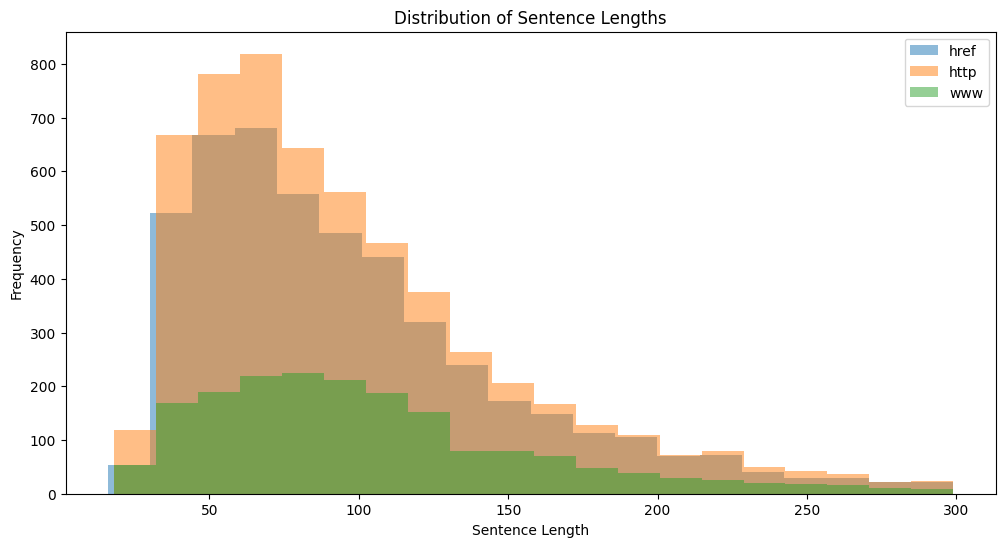

Number of sentences starting with 'href': 4789
Number of sentences starting with 'http': 5632
Number of sentences starting with 'www': 1855


In [20]:
# extract lengths of sentences starting with 'href' and 'http' and 'www'
href_sentence_lengths, http_sentence_lengths, www_sentence_lengths = extract_href_sentence_lengths(df)


plt.figure(figsize=(12, 6))
plt.hist(href_sentence_lengths, bins=20, alpha=0.5, label='href')
plt.hist(http_sentence_lengths, bins=20, alpha=0.5, label='http')
plt.hist(www_sentence_lengths, bins=20, alpha=0.5, label='www')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.legend()
plt.show()
print(f"Number of sentences starting with 'href': {len(href_sentence_lengths)}")
print(f"Number of sentences starting with 'http': {len(http_sentence_lengths)}")
print(f"Number of sentences starting with 'www': {len(www_sentence_lengths)}")

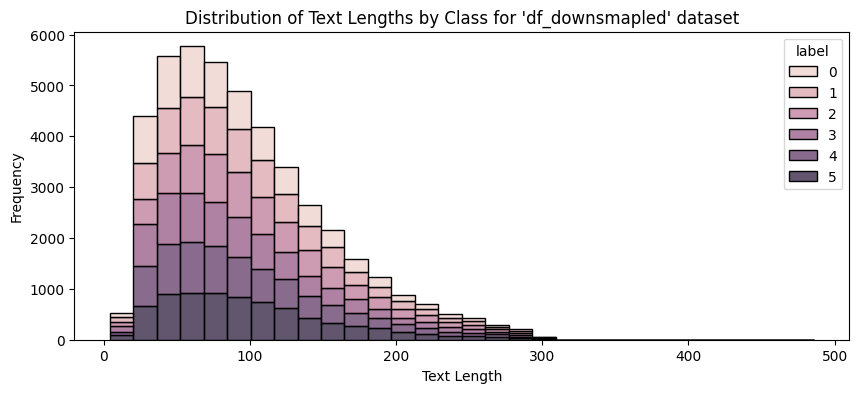

In [21]:
# Plotting te text length for both original_df and df_downsampled to see the difference
# plot_text_length_distribution(df=original_df, df_name='original_df')
plot_text_length_distribution(df_downsampled, df_name='df_downsmapled')

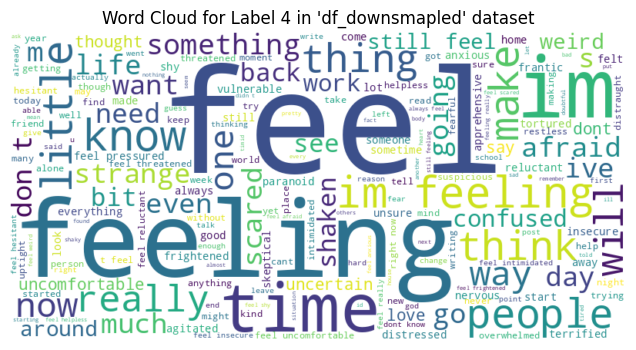

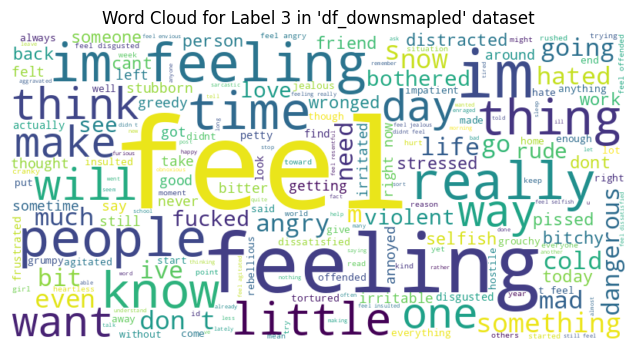

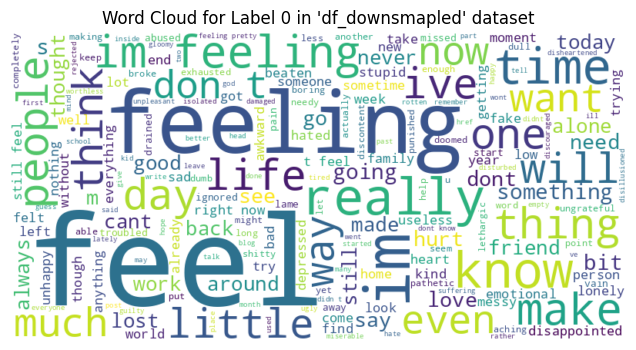

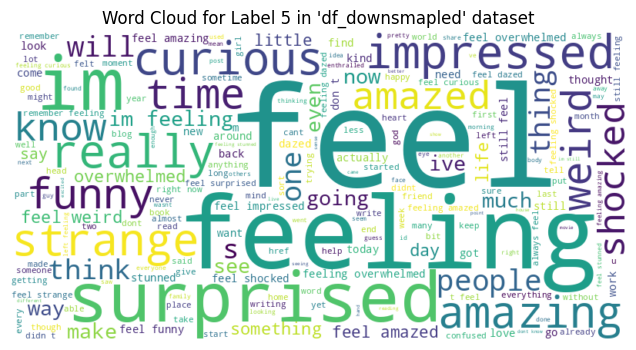

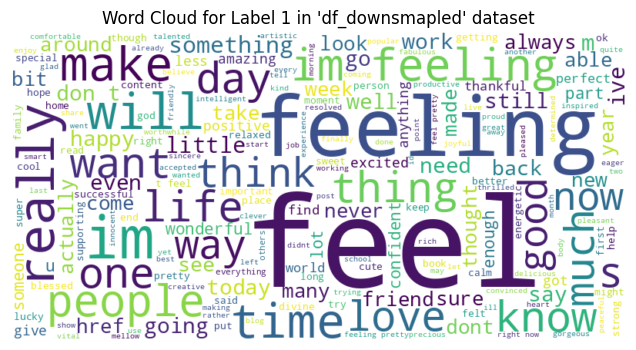

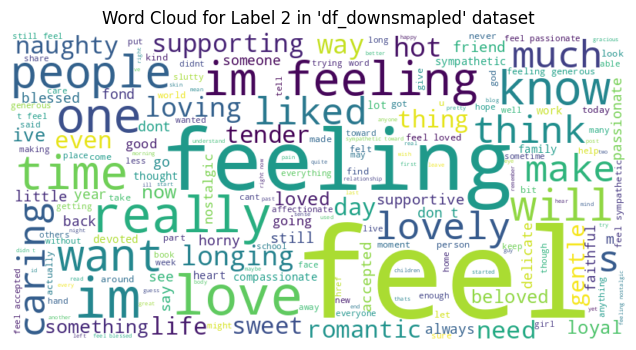

In [22]:
from wordcloud import WordCloud

plot_word_clouds(df=df_downsampled, df_name='df_downsmapled')


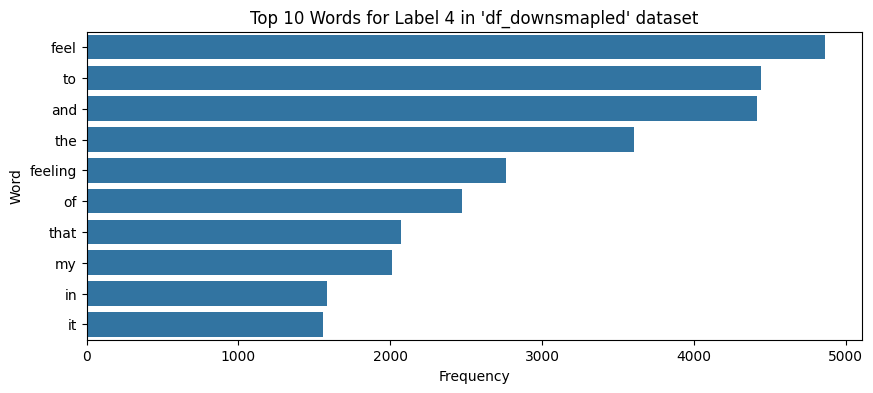

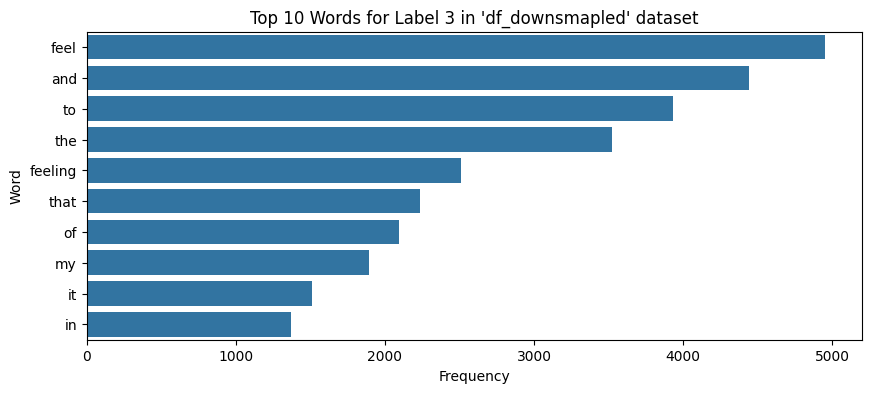

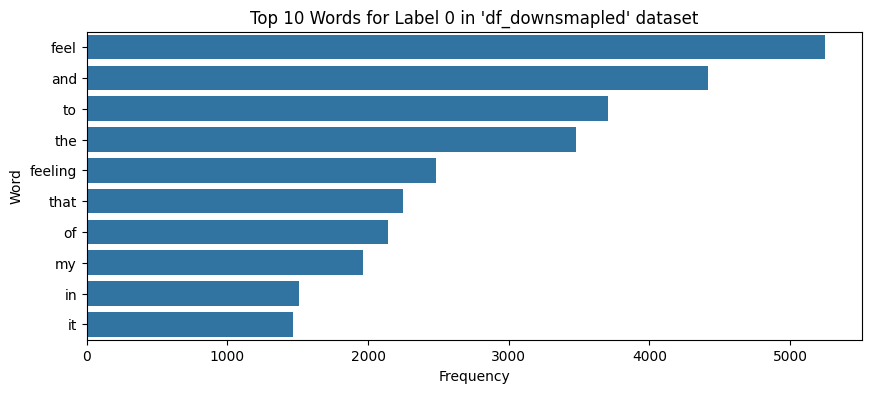

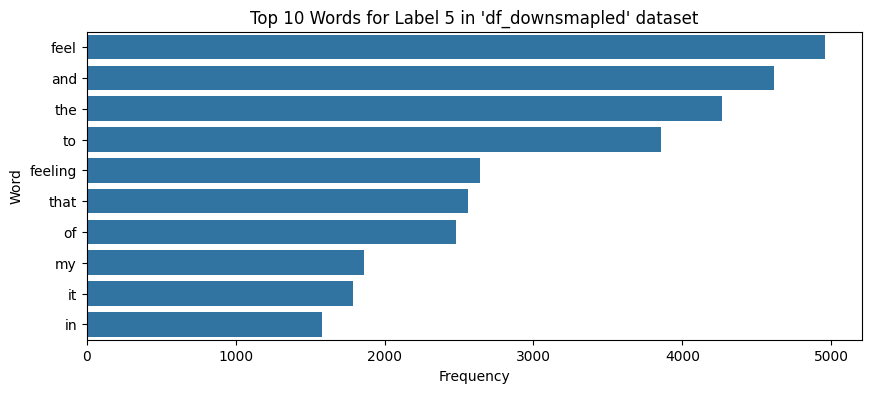

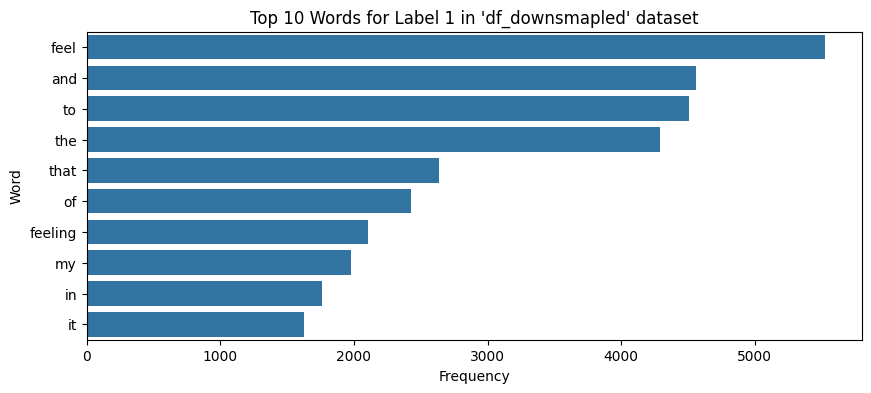

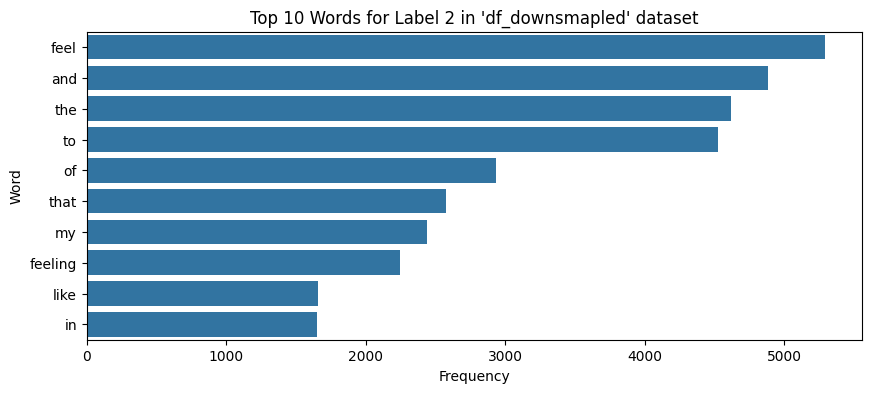

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

plot_top_n_words(df=df_downsampled, df_name='df_downsmapled')


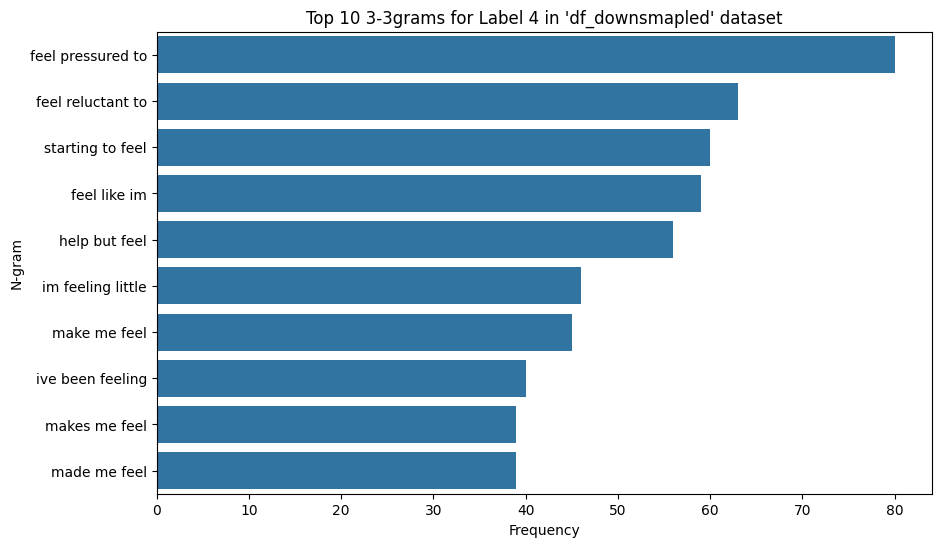

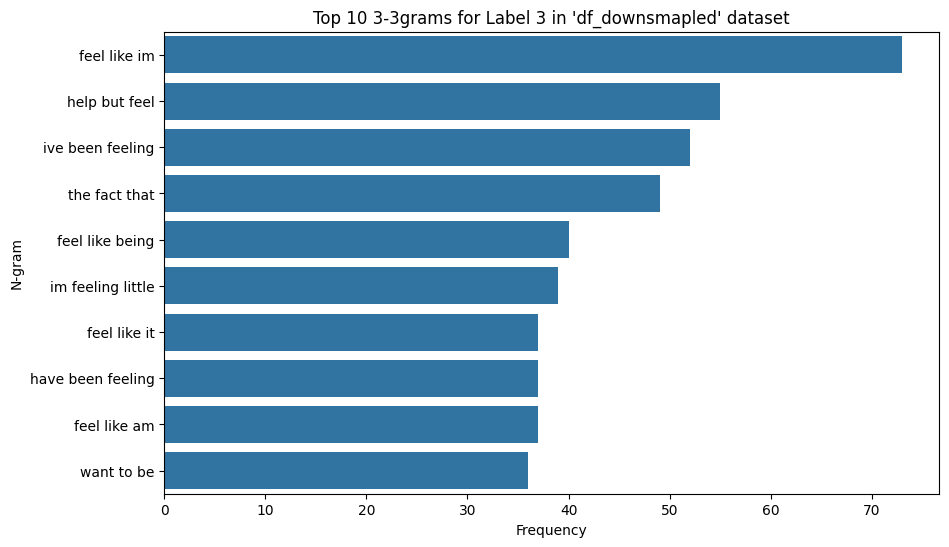

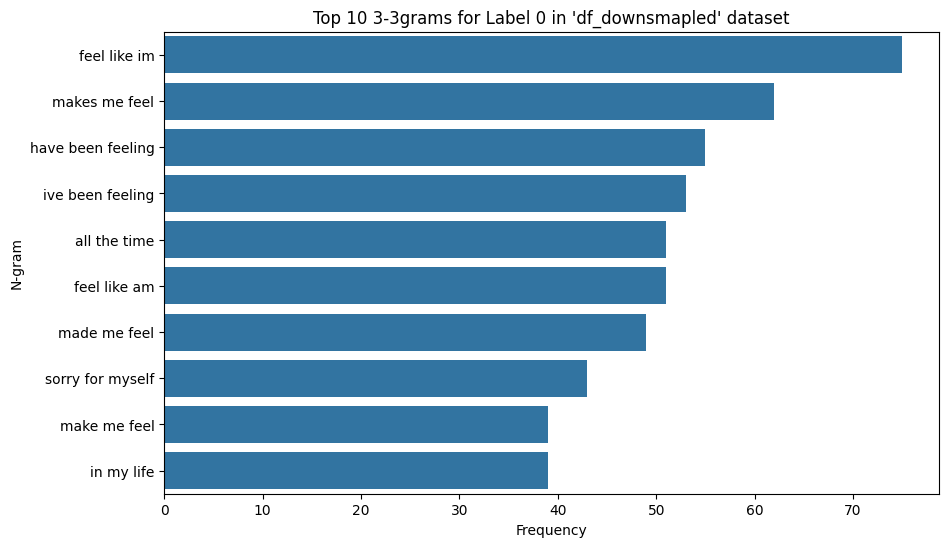

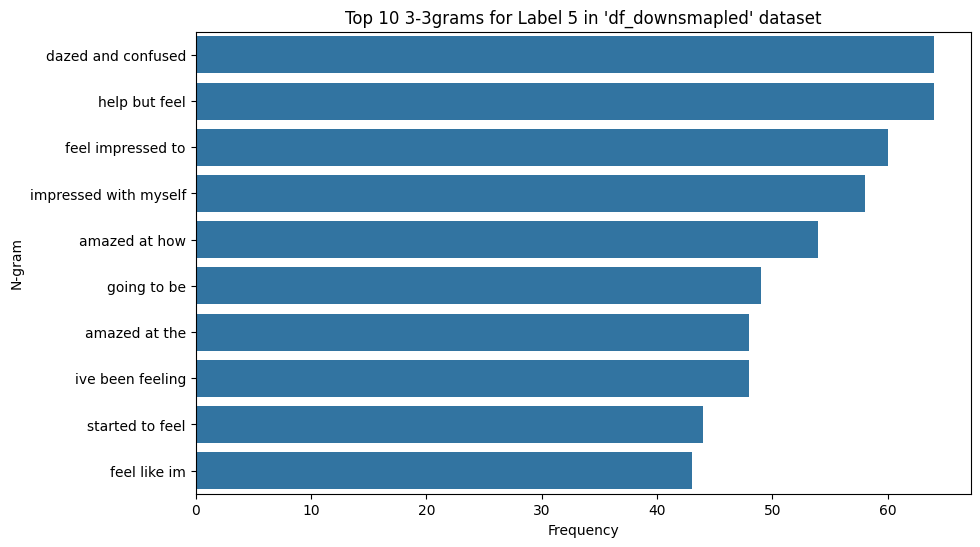

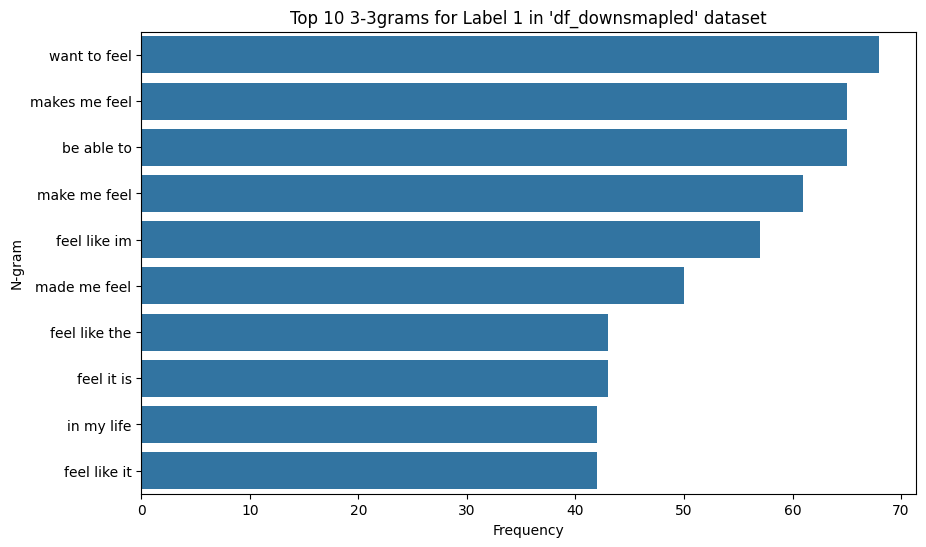

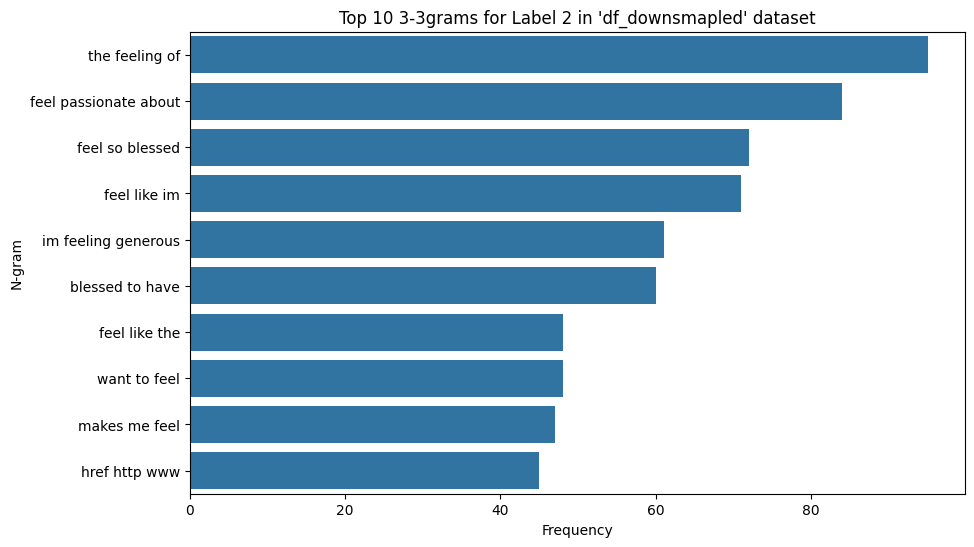

In [24]:
plot_ngrams(df=df_downsampled,  df_name='df_downsmapled', ngram_range=(3, 3))  # For trigrams


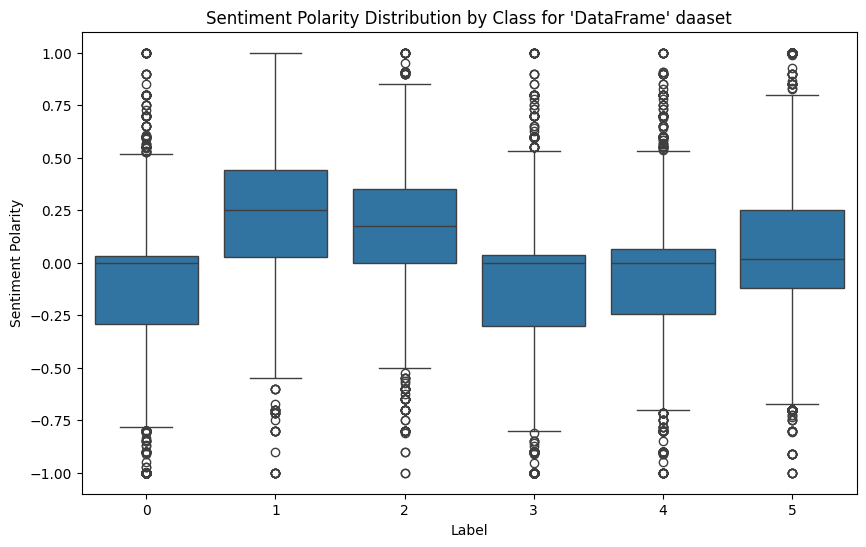

In [25]:
from textblob import TextBlob

plot_sentiment_distribution(df_downsampled)


<Axes: xlabel='sentiment', ylabel='Density'>

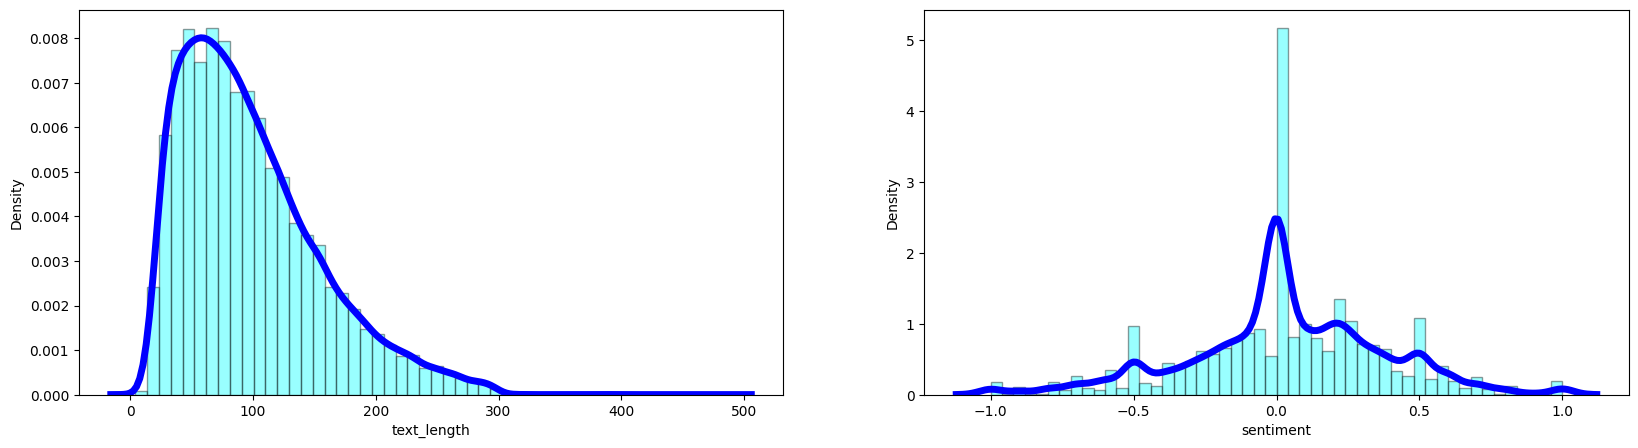

In [26]:
fig, axes = plt.subplots(1,2, figsize = (20,5))
sns.distplot(df_downsampled['text_length'], hist=True, kde=True,
             color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[0])

sns.distplot(df_downsampled['sentiment'], hist=True, kde=True,
             color = 'cyan',
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[1])


**Pre-proccessing in the text phase**




In the next few codes (functions), we will apply several techniques such as: Tokenization, Removing stop words, Stemming, Vectorization, and Embedding.

This applied to make the dataset simpler by splitting the words from each other, removing unneccessary words (that don't contribute to the whole sentence), stemming to convert the words to their base form, vectorization

In [27]:

def tokenize_text(df, text_column='text'):
    """
    Tokenizes the text data.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing text data (default: 'text')
    return: DataFrame with tokenized text
    type: (DataFrame, str) -> DataFrame
    """
    df['tokenized_text'] = df[text_column].apply(word_tokenize)
    return df


def remove_stop_words(df, text_column='tokenized_text'):
    """
    Removes stop words from the tokenized text.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing tokenized text data (default: 'tokenized_text')
    return: DataFrame with stop words removed
    type: (DataFrame, str) -> DataFrame
    """
    custom_stopwords = {"i","im","like", "feel", "feeling", "my", "the", "to", "still"
                        "for","know","littl","think","time","thing","would","go",
                        "really","feel","am","so","get", "one", "to", "and", "at", "can",
                        "day","way", "make", "me", "want", "could" , "would", "tri", "u", "href", "http", "www", "com", "https"
                        }
    stop_words = set(stopwords.words('english'))
    stop_words.update(custom_stopwords)
    df['text_no_stopwords'] = df[text_column].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    return df

In [28]:
def apply_stemming(df, text_column='text_no_stopwords'):
    """
    Applies stemming to the text data.

    param: df: DataFrame containing the data
    param: text_column: Name of the column containing text data without stop words (default: 'text_no_stopwords')
    return: DataFrame with stemmed text
    type: (DataFrame, str) -> DataFrame
    """
    stemmer = PorterStemmer()
    df['stemmed_text'] = df[text_column].apply(lambda x: [stemmer.stem(word) for word in x])
    return df

In [29]:
def load_glove_vectors(glove_file):
    """
    Loads GloVe vectors from a file.

    param: glove_file: Path to the GloVe file
    return: Dictionary of word to vector mappings
    type: str -> dict
    """
    glove_model = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    return glove_model


In [30]:
def get_glove_embeddings(df, glove_model, text_column='stemmed_text'):
    """
    Gets word embeddings using GloVe.

    param: df: DataFrame containing the data
    param: glove_model: Dictionary of GloVe vectors
    param: text_column: Name of the column containing stemmed text data (default: 'stemmed_text')
    return: DataFrame with word embeddings
    type: (DataFrame, dict, str) -> DataFrame
    """
    def embed_text(tokens):
        embedding_dim = len(next(iter(glove_model.values())))
        embeddings = [glove_model[word] for word in tokens if word in glove_model]
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(embedding_dim)

    df['text_embedding'] = df[text_column].apply(embed_text)
    return df


In [31]:
def preprocess_text_data(df, glove_model, text_column='text', label_column='label'):
    """
    Preprocesses text data through tokenization, stop word removal, stemming, and embedding.

    param: df: DataFrame containing the data
    param: glove_model: Dictionary of GloVe vectors
    param: text_column: Name of the column containing text data (default: 'text')
    param: label_column: Name of the column containing label data (default: 'label')
    return: Preprocessed DataFrame with embeddings
    type: (DataFrame, dict, str, str) -> DataFrame
    """
    df = tokenize_text(df, text_column)
    df = remove_stop_words(df)
    df = apply_stemming(df)
    df = get_glove_embeddings(df, glove_model)
    return df

In [32]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [33]:
# Load GloVe model
glove_file = "drive/MyDrive/kaggle_files/glove.6B.100d.txt"  # Path to the GloVe file
glove_model = load_glove_vectors(glove_file)

In [34]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
df_downsampled_preprocessed = preprocess_text_data(df_downsampled, glove_model)
print(df_downsampled_preprocessed.head())

   Unnamed: 0                                               text  label  \
0       84526                     i feel shaken up and torn down      4   
1      227655                                       on reperbahn      3   
2      339603  i feel insulted that he doesnt know me better ...      3   
3      281246  i imagine that my fellow liberals get the same...      3   
4      192230  i dont know why im writing it here and not tel...      3   

   text_length  sentiment                                     tokenized_text  \
0           30  -0.155556             [i, feel, shaken, up, and, torn, down]   
1           12   0.000000                                    [on, reperbahn]   
2           55   0.500000  [i, feel, insulted, that, he, doesnt, know, me...   
3          150   0.183333  [i, imagine, that, my, fellow, liberals, get, ...   
4          131   0.000000  [i, dont, know, why, im, writing, it, here, an...   

                                   text_no_stopwords  \
0           

In [36]:
df_downsampled_preprocessed.head()

,Unnamed: 0,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding
0,84526,i feel shaken up and torn down,4,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0...."
1,227655,on reperbahn,3,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,339603,i feel insulted that he doesnt know me better ...,3,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0...."
3,281246,i imagine that my fellow liberals get the same...,3,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1..."
4,192230,i dont know why im writing it here and not tel...,3,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0..."


In [37]:
df_downsampled_preprocessed['sentence_stemmed_text'] = df_downsampled_preprocessed['stemmed_text'].apply(lambda x: ','.join(x))


In [38]:
df_downsampled_preprocessed.head()

,Unnamed: 0,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding,sentence_stemmed_text
0,84526,i feel shaken up and torn down,4,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0....","shaken,torn"
1,227655,on reperbahn,3,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",reperbahn
2,339603,i feel insulted that he doesnt know me better ...,3,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0....","insult,doesnt,better"
3,281246,i imagine that my fellow liberals get the same...,3,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1...","imagin,fellow,liber,warm,feel,read,messag,cons..."
4,192230,i dont know why im writing it here and not tel...,3,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0...","dont,write,tell,bet,theyr,total,unawar,dissatisfi"


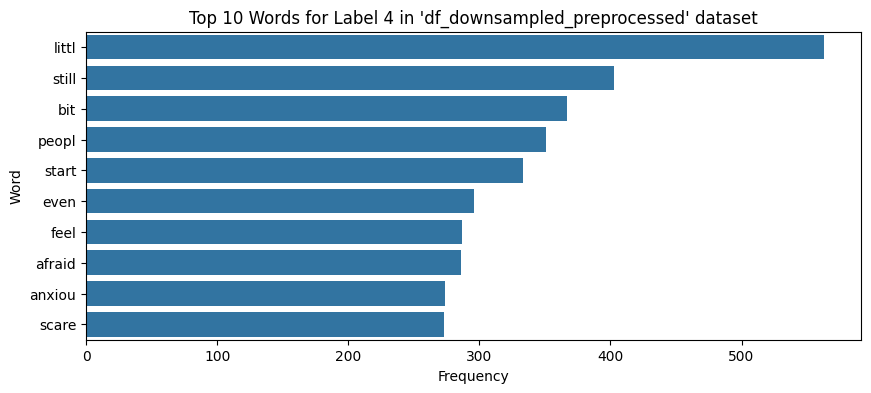

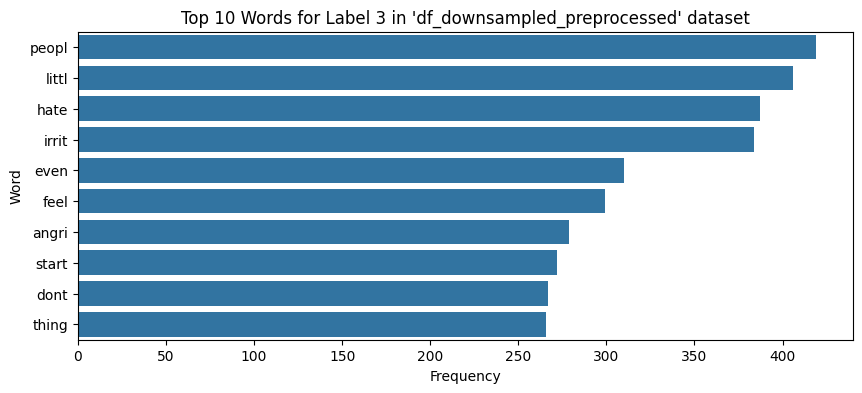

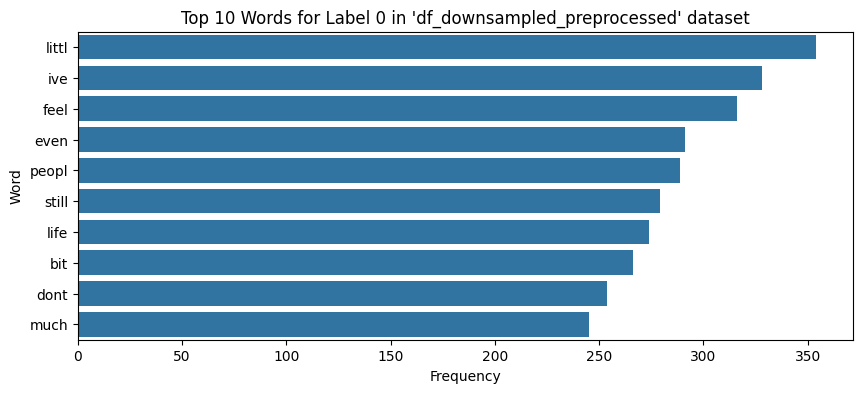

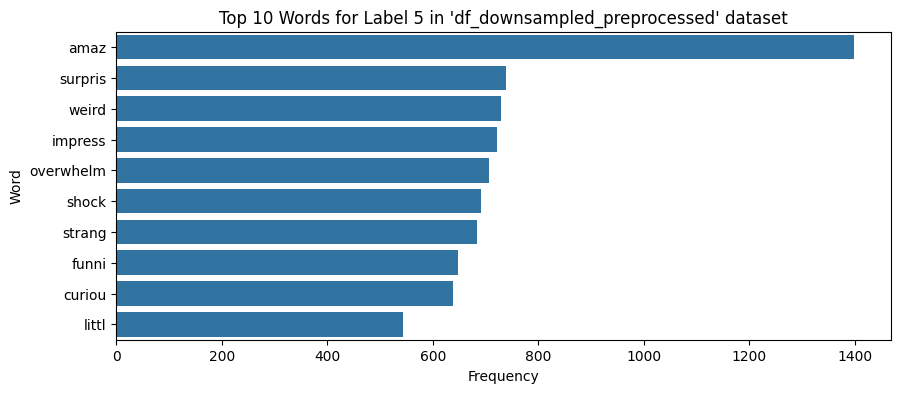

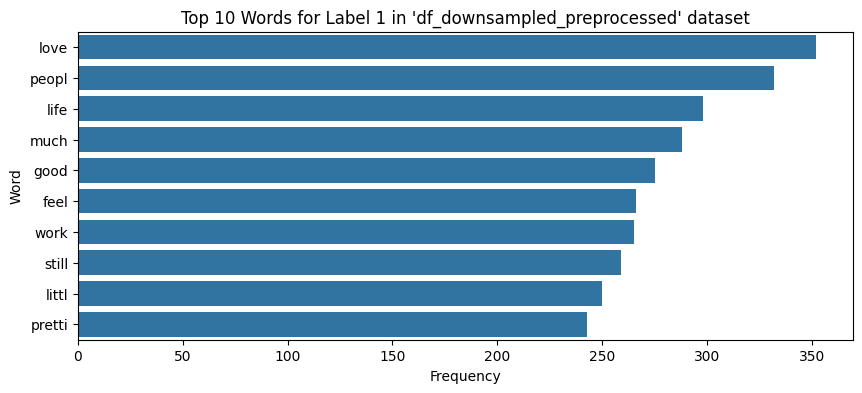

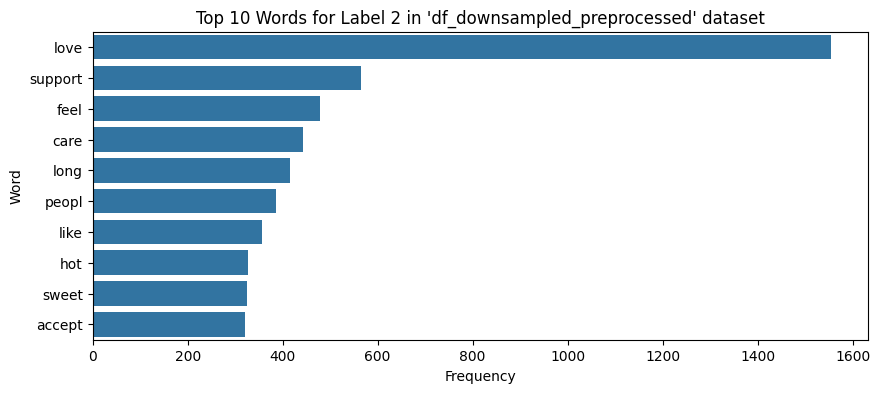

In [39]:
plot_top_n_words(df=df_downsampled_preprocessed, df_name='df_downsampled_preprocessed', text_column='sentence_stemmed_text')


<Axes: >

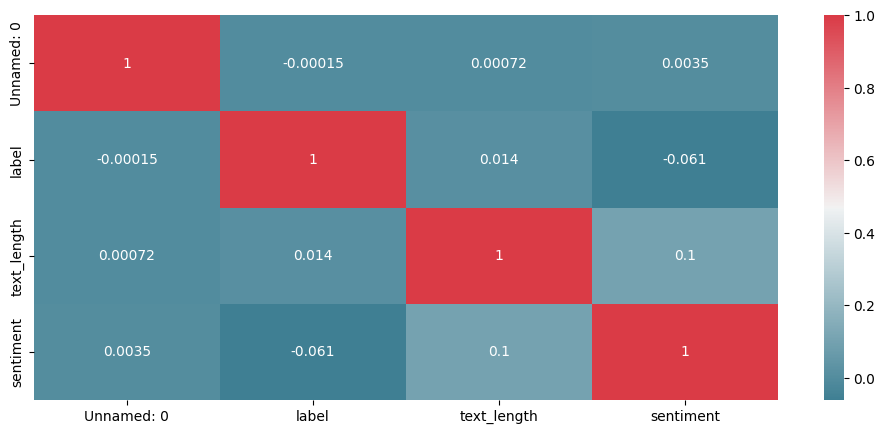

In [40]:
plt.subplots(figsize=(12,5))
df = df_downsampled_preprocessed.drop(['text', 'tokenized_text', 'text_no_stopwords', 'stemmed_text', 'text_embedding', 'sentence_stemmed_text'], axis=1)
corr = df.corr()
sns.heatmap(corr,annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# Splitting data

In [41]:
def split_data(df, test_size=0.2, random_state=42):
  """
  Splits the dataset into training and testing sets.

  param: df: DataFrame containing the data
  param: test_size: Size of the testing set (default: 0.2)
  param: random_state: Random seed for reproducibility (default: 42)

  return: X_train, X_test, y_train, y_test
  """
  # Extract features and target
  # text_length = df['text_length'].values.reshape(-1, 1) tried to omit this column and found out that the results better without this column
  sentiment = df['sentiment'].values.reshape(-1, 1)
  X_embeddings = np.vstack(df['text_embedding'].values)

  X = np.hstack((sentiment, X_embeddings))

  # Extract target
  y = df['label'].values

  # split to train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  return X_train, X_test, y_train, y_test

In [42]:
# X_train_original, X_test_original, y_train_original, y_test_original = split_data(df=original_df, test_size=0.3)
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = split_data(df_downsampled_preprocessed)
print(f"Train set length for df_downsampled dataset is {X_train_downsampled.shape[0]}")
print(f"Test set length for df_downsampled dataset is {X_test_downsampled.shape[0]}")

Train set length for df_downsampled dataset is 35932
Test set length for df_downsampled dataset is 8984


# Training and tuning models

In [43]:
from sklearn.model_selection import train_test_split

X_knn, _, y_knn, _ = train_test_split(
    X_train_downsampled, y_train_downsampled,
    train_size=0.2, stratify=y_train_downsampled, random_state=42
)


In [44]:
def tune_hyperparameters(model_class, param_distributions, X, y, n_trials=20):

    from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
    import optuna, time

    X_small, _, y_small, _ = train_test_split(X, y, train_size=0.3, stratify=y, random_state=42)

    def objective(trial):
        params = {key: trial._suggest(key, dist) for key, dist in param_distributions.items()}
        model = model_class(**params)
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        start = time.time()
        score = cross_val_score(model, X_small, y_small, cv=cv, scoring='accuracy').mean()
        print(f"Trial {trial.number} - time: {time.time() - start:.2f}s - score: {score:.4f} - params: {params}")
        return score

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    return study.best_params, study.best_value


In [45]:
# define hyperparameter for KNeighborsClassifier
param_distributions_knn = {
    'n_neighbors': optuna.distributions.IntDistribution(1, 50),
    'weights': optuna.distributions.CategoricalDistribution(['uniform', 'distance']),
    'algorithm': optuna.distributions.CategoricalDistribution(['auto', 'ball_tree', 'kd_tree'])
}

best_params_knn, best_score_knn = tune_hyperparameters(KNeighborsClassifier, param_distributions_knn, X_train_downsampled, y_train_downsampled, n_trials=15)

print('Best hyperparameters for KNN: ', best_params_knn)
print('Best cross-validation score for KNN: ', best_score_knn)

[I 2025-07-29 16:03:28,718] A new study created in memory with name: no-name-e259af20-ead4-4933-baa2-d6252811e05f
[I 2025-07-29 16:03:49,123] Trial 0 finished with value: 0.3700714351980703 and parameters: {'n_neighbors': 42, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.3700714351980703.


Trial 0 - time: 20.39s - score: 0.3701 - params: {'n_neighbors': 42, 'weights': 'uniform', 'algorithm': 'kd_tree'}


[I 2025-07-29 16:03:50,052] Trial 1 finished with value: 0.36784488356990447 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 0 with value: 0.3700714351980703.


Trial 1 - time: 0.93s - score: 0.3678 - params: {'n_neighbors': 18, 'weights': 'distance', 'algorithm': 'auto'}


[I 2025-07-29 16:04:05,017] Trial 2 finished with value: 0.31329436867984045 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.3700714351980703.


Trial 2 - time: 14.96s - score: 0.3133 - params: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'kd_tree'}


[I 2025-07-29 16:04:21,601] Trial 3 finished with value: 0.3690509323684943 and parameters: {'n_neighbors': 44, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.3700714351980703.


Trial 3 - time: 16.58s - score: 0.3691 - params: {'n_neighbors': 44, 'weights': 'uniform', 'algorithm': 'kd_tree'}


[I 2025-07-29 16:04:34,381] Trial 4 finished with value: 0.375637814268485 and parameters: {'n_neighbors': 48, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 4 with value: 0.375637814268485.


Trial 4 - time: 12.78s - score: 0.3756 - params: {'n_neighbors': 48, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-29 16:04:47,414] Trial 5 finished with value: 0.35430002783189535 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'ball_tree'}. Best is trial 4 with value: 0.375637814268485.


Trial 5 - time: 13.03s - score: 0.3543 - params: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'ball_tree'}


[I 2025-07-29 16:04:48,393] Trial 6 finished with value: 0.3739679005473606 and parameters: {'n_neighbors': 35, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 4 with value: 0.375637814268485.


Trial 6 - time: 0.98s - score: 0.3740 - params: {'n_neighbors': 35, 'weights': 'distance', 'algorithm': 'auto'}


[I 2025-07-29 16:04:49,219] Trial 7 finished with value: 0.3512385193431673 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 4 with value: 0.375637814268485.


Trial 7 - time: 0.82s - score: 0.3512 - params: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'}


[I 2025-07-29 16:05:07,500] Trial 8 finished with value: 0.36357732628258654 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'algorithm': 'kd_tree'}. Best is trial 4 with value: 0.375637814268485.


Trial 8 - time: 18.28s - score: 0.3636 - params: {'n_neighbors': 16, 'weights': 'uniform', 'algorithm': 'kd_tree'}


[I 2025-07-29 16:05:08,622] Trial 9 finished with value: 0.3739679005473606 and parameters: {'n_neighbors': 34, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 4 with value: 0.375637814268485.


Trial 9 - time: 1.12s - score: 0.3740 - params: {'n_neighbors': 34, 'weights': 'distance', 'algorithm': 'auto'}


[I 2025-07-29 16:05:22,271] Trial 10 finished with value: 0.37647277112904726 and parameters: {'n_neighbors': 49, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 10 with value: 0.37647277112904726.


Trial 10 - time: 13.64s - score: 0.3765 - params: {'n_neighbors': 49, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-29 16:05:35,016] Trial 11 finished with value: 0.37749327395862325 and parameters: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 11 with value: 0.37749327395862325.


Trial 11 - time: 12.74s - score: 0.3775 - params: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-29 16:05:47,529] Trial 12 finished with value: 0.37749327395862325 and parameters: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 11 with value: 0.37749327395862325.


Trial 12 - time: 12.50s - score: 0.3775 - params: {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-29 16:05:59,753] Trial 13 finished with value: 0.3743389924853882 and parameters: {'n_neighbors': 34, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 11 with value: 0.37749327395862325.


Trial 13 - time: 12.21s - score: 0.3743 - params: {'n_neighbors': 34, 'weights': 'distance', 'algorithm': 'ball_tree'}


[I 2025-07-29 16:06:12,525] Trial 14 finished with value: 0.37266907876426386 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 11 with value: 0.37749327395862325.


Trial 14 - time: 12.76s - score: 0.3727 - params: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'ball_tree'}
Best hyperparameters for KNN:  {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'ball_tree'}
Best cross-validation score for KNN:  0.37749327395862325


In [46]:

X_small, _, y_small, _ = train_test_split(X_train_downsampled, y_train_downsampled, train_size=0.1, stratify=y_train_downsampled, random_state=42)


In [47]:
# define hyperparameter space for RandomForestClassifier
param_distributions_rf = {
    'n_estimators': optuna.distributions.IntDistribution(30, 300, 10),
    'max_features': optuna.distributions.CategoricalDistribution(['sqrt', 'log2']),
    'max_depth': optuna.distributions.IntDistribution(2, 20),
    'min_samples_split': optuna.distributions.IntDistribution(2, 14),
    "min_samples_leaf": optuna.distributions.IntDistribution(1, 10)
}

best_params_rf, best_score_rf = tune_hyperparameters(RandomForestClassifier, param_distributions_rf, X_small, y_small, n_trials=15)

print('Best hyperparameters for Random Forest: ', best_params_rf)
print('Best cross-validation score for Random Forest: ', best_score_rf)

[I 2025-07-29 16:06:12,610] A new study created in memory with name: no-name-f4d8461a-e4f0-4eed-8d07-18e7f3f569ea
[I 2025-07-29 16:06:13,593] Trial 0 finished with value: 0.2999071494893222 and parameters: {'n_estimators': 72, 'max_features': 'log2', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.2999071494893222.


Trial 0 - time: 0.98s - score: 0.2999 - params: {'n_estimators': 72, 'max_features': 'log2', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 10}


[I 2025-07-29 16:06:14,475] Trial 1 finished with value: 0.2813370473537604 and parameters: {'n_estimators': 35, 'max_features': 'sqrt', 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.2999071494893222.


Trial 1 - time: 0.88s - score: 0.2813 - params: {'n_estimators': 35, 'max_features': 'sqrt', 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 7}


[I 2025-07-29 16:06:16,825] Trial 2 finished with value: 0.3212627669452182 and parameters: {'n_estimators': 87, 'max_features': 'sqrt', 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.3212627669452182.


Trial 2 - time: 2.35s - score: 0.3213 - params: {'n_estimators': 87, 'max_features': 'sqrt', 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 5}


[I 2025-07-29 16:06:18,277] Trial 3 finished with value: 0.29712163416898796 and parameters: {'n_estimators': 83, 'max_features': 'log2', 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.3212627669452182.


Trial 3 - time: 1.45s - score: 0.2971 - params: {'n_estimators': 83, 'max_features': 'log2', 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 3}


[I 2025-07-29 16:06:19,357] Trial 4 finished with value: 0.28690807799442897 and parameters: {'n_estimators': 56, 'max_features': 'sqrt', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.3212627669452182.


Trial 4 - time: 1.08s - score: 0.2869 - params: {'n_estimators': 56, 'max_features': 'sqrt', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 5}


[I 2025-07-29 16:06:22,055] Trial 5 finished with value: 0.3212627669452182 and parameters: {'n_estimators': 138, 'max_features': 'sqrt', 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.3212627669452182.


Trial 5 - time: 2.70s - score: 0.3213 - params: {'n_estimators': 138, 'max_features': 'sqrt', 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 5}


[I 2025-07-29 16:06:22,867] Trial 6 finished with value: 0.30547818012999073 and parameters: {'n_estimators': 45, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.3212627669452182.


Trial 6 - time: 0.81s - score: 0.3055 - params: {'n_estimators': 45, 'max_features': 'sqrt', 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 8}


[I 2025-07-29 16:06:23,395] Trial 7 finished with value: 0.2822655524605386 and parameters: {'n_estimators': 41, 'max_features': 'sqrt', 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.3212627669452182.


Trial 7 - time: 0.53s - score: 0.2823 - params: {'n_estimators': 41, 'max_features': 'sqrt', 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 6}


[I 2025-07-29 16:06:25,074] Trial 8 finished with value: 0.3268337975858867 and parameters: {'n_estimators': 133, 'max_features': 'log2', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 8 with value: 0.3268337975858867.


Trial 8 - time: 1.68s - score: 0.3268 - params: {'n_estimators': 133, 'max_features': 'log2', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 8}


[I 2025-07-29 16:06:26,084] Trial 9 finished with value: 0.30269266480965645 and parameters: {'n_estimators': 73, 'max_features': 'log2', 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 8 with value: 0.3268337975858867.


Trial 9 - time: 1.01s - score: 0.3027 - params: {'n_estimators': 73, 'max_features': 'log2', 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 2}


[I 2025-07-29 16:06:28,454] Trial 10 finished with value: 0.28969359331476324 and parameters: {'n_estimators': 283, 'max_features': 'log2', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 8 with value: 0.3268337975858867.


Trial 10 - time: 2.35s - score: 0.2897 - params: {'n_estimators': 283, 'max_features': 'log2', 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 10}


[I 2025-07-29 16:06:31,174] Trial 11 finished with value: 0.3017641597028784 and parameters: {'n_estimators': 148, 'max_features': 'log2', 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 8 with value: 0.3268337975858867.


Trial 11 - time: 2.69s - score: 0.3018 - params: {'n_estimators': 148, 'max_features': 'log2', 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 8}


[I 2025-07-29 16:06:33,852] Trial 12 finished with value: 0.32404828226555243 and parameters: {'n_estimators': 133, 'max_features': 'sqrt', 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 8 with value: 0.3268337975858867.


Trial 12 - time: 2.64s - score: 0.3240 - params: {'n_estimators': 133, 'max_features': 'sqrt', 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 4}


[I 2025-07-29 16:06:36,256] Trial 13 finished with value: 0.32404828226555243 and parameters: {'n_estimators': 165, 'max_features': 'log2', 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 8 with value: 0.3268337975858867.


Trial 13 - time: 2.38s - score: 0.3240 - params: {'n_estimators': 165, 'max_features': 'log2', 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 3}


[I 2025-07-29 16:06:39,474] Trial 14 finished with value: 0.32126276694521816 and parameters: {'n_estimators': 210, 'max_features': 'sqrt', 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 8 with value: 0.3268337975858867.


Trial 14 - time: 3.20s - score: 0.3213 - params: {'n_estimators': 210, 'max_features': 'sqrt', 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 8}
Best hyperparameters for Random Forest:  {'n_estimators': 133, 'max_features': 'log2', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 8}
Best cross-validation score for Random Forest:  0.3268337975858867


In [48]:
# define hyperparameter for LinearSVC
param_distributions_linear_svc = {
    'C': optuna.distributions.LogUniformDistribution(0.1, 10)
}

best_params_linear_svc, best_score_linear_svc = tune_hyperparameters(LinearSVC, param_distributions_linear_svc, X_small, y_small, n_trials=15)

print('Best hyperparameters for LinearSVC: ', best_params_linear_svc)
print('Best cross-validation score for LinearSVC: ', best_score_linear_svc)

[I 2025-07-29 16:06:39,489] A new study created in memory with name: no-name-1652875c-13a6-438b-b342-915591d39dbd
[I 2025-07-29 16:06:39,725] Trial 0 finished with value: 0.34818941504178275 and parameters: {'C': 4.19806938864974}. Best is trial 0 with value: 0.34818941504178275.


Trial 0 - time: 0.23s - score: 0.3482 - params: {'C': 4.19806938864974}


[I 2025-07-29 16:06:39,948] Trial 1 finished with value: 0.35004642525533886 and parameters: {'C': 2.6032622553497626}. Best is trial 1 with value: 0.35004642525533886.


Trial 1 - time: 0.22s - score: 0.3500 - params: {'C': 2.6032622553497626}


[I 2025-07-29 16:06:40,178] Trial 2 finished with value: 0.35004642525533886 and parameters: {'C': 2.0028015663203713}. Best is trial 1 with value: 0.35004642525533886.


Trial 2 - time: 0.23s - score: 0.3500 - params: {'C': 2.0028015663203713}


[I 2025-07-29 16:06:40,403] Trial 3 finished with value: 0.35004642525533886 and parameters: {'C': 1.9967070291631337}. Best is trial 1 with value: 0.35004642525533886.


Trial 3 - time: 0.22s - score: 0.3500 - params: {'C': 1.9967070291631337}


[I 2025-07-29 16:06:40,638] Trial 4 finished with value: 0.35004642525533886 and parameters: {'C': 2.501105929919336}. Best is trial 1 with value: 0.35004642525533886.


Trial 4 - time: 0.23s - score: 0.3500 - params: {'C': 2.501105929919336}


[I 2025-07-29 16:06:40,855] Trial 5 finished with value: 0.3528319405756732 and parameters: {'C': 1.4116028892478916}. Best is trial 5 with value: 0.3528319405756732.


Trial 5 - time: 0.22s - score: 0.3528 - params: {'C': 1.4116028892478916}


[I 2025-07-29 16:06:41,078] Trial 6 finished with value: 0.3491179201485608 and parameters: {'C': 3.8929362986786615}. Best is trial 5 with value: 0.3528319405756732.


Trial 6 - time: 0.22s - score: 0.3491 - params: {'C': 3.8929362986786615}


[I 2025-07-29 16:06:41,305] Trial 7 finished with value: 0.3435468895078923 and parameters: {'C': 7.571812743847696}. Best is trial 5 with value: 0.3528319405756732.


Trial 7 - time: 0.22s - score: 0.3435 - params: {'C': 7.571812743847696}


[I 2025-07-29 16:06:41,567] Trial 8 finished with value: 0.35654596100278546 and parameters: {'C': 0.44222776360169846}. Best is trial 8 with value: 0.35654596100278546.


Trial 8 - time: 0.26s - score: 0.3565 - params: {'C': 0.44222776360169846}


[I 2025-07-29 16:06:41,867] Trial 9 finished with value: 0.3528319405756732 and parameters: {'C': 1.2151859556689786}. Best is trial 8 with value: 0.35654596100278546.


Trial 9 - time: 0.30s - score: 0.3528 - params: {'C': 1.2151859556689786}


[I 2025-07-29 16:06:42,109] Trial 10 finished with value: 0.36211699164345407 and parameters: {'C': 0.19494473491062614}. Best is trial 10 with value: 0.36211699164345407.


Trial 10 - time: 0.23s - score: 0.3621 - params: {'C': 0.19494473491062614}


[I 2025-07-29 16:06:42,373] Trial 11 finished with value: 0.35933147632311974 and parameters: {'C': 0.24817564305114923}. Best is trial 10 with value: 0.36211699164345407.


Trial 11 - time: 0.26s - score: 0.3593 - params: {'C': 0.24817564305114923}


[I 2025-07-29 16:06:42,595] Trial 12 finished with value: 0.3584029712163417 and parameters: {'C': 0.10434539068104402}. Best is trial 10 with value: 0.36211699164345407.


Trial 12 - time: 0.21s - score: 0.3584 - params: {'C': 0.10434539068104402}


[I 2025-07-29 16:06:42,857] Trial 13 finished with value: 0.3565459610027855 and parameters: {'C': 0.27401532806469164}. Best is trial 10 with value: 0.36211699164345407.


Trial 13 - time: 0.25s - score: 0.3565 - params: {'C': 0.27401532806469164}


[I 2025-07-29 16:06:43,072] Trial 14 finished with value: 0.35933147632311974 and parameters: {'C': 0.10634774847269093}. Best is trial 10 with value: 0.36211699164345407.


Trial 14 - time: 0.21s - score: 0.3593 - params: {'C': 0.10634774847269093}
Best hyperparameters for LinearSVC:  {'C': 0.19494473491062614}
Best cross-validation score for LinearSVC:  0.36211699164345407


In [49]:
import optuna, time
# define hyperparameter for AdaBoost
param_distributions_ada = {
    'n_estimators': optuna.distributions.IntDistribution(50, 200),
    'learning_rate': optuna.distributions.LogUniformDistribution(1e-1, 1.0)
}

best_params_ada, best_score_ada = tune_hyperparameters(AdaBoostClassifier, param_distributions_ada, X_small, y_small, n_trials=15)

print('Best hyperparameters for AdaBoost: ', best_params_ada)
print('Best cross-validation score for AdaBoost: ', best_score_ada)


[I 2025-07-29 16:06:43,088] A new study created in memory with name: no-name-ea1f5b4a-bdbb-471f-8d19-ca5132d8ef9a
[I 2025-07-29 16:06:51,555] Trial 0 finished with value: 0.28690807799442897 and parameters: {'n_estimators': 188, 'learning_rate': 0.6094168098090268}. Best is trial 0 with value: 0.28690807799442897.


Trial 0 - time: 8.46s - score: 0.2869 - params: {'n_estimators': 188, 'learning_rate': 0.6094168098090268}


[I 2025-07-29 16:06:55,919] Trial 1 finished with value: 0.2525533890436398 and parameters: {'n_estimators': 99, 'learning_rate': 0.37487047786121663}. Best is trial 0 with value: 0.28690807799442897.


Trial 1 - time: 4.36s - score: 0.2526 - params: {'n_estimators': 99, 'learning_rate': 0.37487047786121663}


[I 2025-07-29 16:07:04,150] Trial 2 finished with value: 0.2432683379758589 and parameters: {'n_estimators': 177, 'learning_rate': 0.15317557410921695}. Best is trial 0 with value: 0.28690807799442897.


Trial 2 - time: 8.23s - score: 0.2433 - params: {'n_estimators': 177, 'learning_rate': 0.15317557410921695}


[I 2025-07-29 16:07:08,867] Trial 3 finished with value: 0.22562674094707522 and parameters: {'n_estimators': 112, 'learning_rate': 0.14796384006892732}. Best is trial 0 with value: 0.28690807799442897.


Trial 3 - time: 4.72s - score: 0.2256 - params: {'n_estimators': 112, 'learning_rate': 0.14796384006892732}


[I 2025-07-29 16:07:13,460] Trial 4 finished with value: 0.286908077994429 and parameters: {'n_estimators': 85, 'learning_rate': 0.7616671837115091}. Best is trial 4 with value: 0.286908077994429.


Trial 4 - time: 4.59s - score: 0.2869 - params: {'n_estimators': 85, 'learning_rate': 0.7616671837115091}


[I 2025-07-29 16:07:15,584] Trial 5 finished with value: 0.25069637883008355 and parameters: {'n_estimators': 50, 'learning_rate': 0.4257028139859456}. Best is trial 4 with value: 0.286908077994429.


Trial 5 - time: 2.12s - score: 0.2507 - params: {'n_estimators': 50, 'learning_rate': 0.4257028139859456}


[I 2025-07-29 16:07:18,038] Trial 6 finished with value: 0.22748375116063135 and parameters: {'n_estimators': 57, 'learning_rate': 0.18643240459867882}. Best is trial 4 with value: 0.286908077994429.


Trial 6 - time: 2.45s - score: 0.2275 - params: {'n_estimators': 57, 'learning_rate': 0.18643240459867882}


[I 2025-07-29 16:07:26,372] Trial 7 finished with value: 0.28040854224698236 and parameters: {'n_estimators': 178, 'learning_rate': 0.32237491044198835}. Best is trial 4 with value: 0.286908077994429.


Trial 7 - time: 8.33s - score: 0.2804 - params: {'n_estimators': 178, 'learning_rate': 0.32237491044198835}


[I 2025-07-29 16:07:33,477] Trial 8 finished with value: 0.24141132776230267 and parameters: {'n_estimators': 168, 'learning_rate': 0.1935165766014614}. Best is trial 4 with value: 0.286908077994429.


Trial 8 - time: 7.10s - score: 0.2414 - params: {'n_estimators': 168, 'learning_rate': 0.1935165766014614}


[I 2025-07-29 16:07:42,568] Trial 9 finished with value: 0.2878365831012071 and parameters: {'n_estimators': 193, 'learning_rate': 0.9279338550586375}. Best is trial 9 with value: 0.2878365831012071.


Trial 9 - time: 9.09s - score: 0.2878 - params: {'n_estimators': 193, 'learning_rate': 0.9279338550586375}


[I 2025-07-29 16:07:48,351] Trial 10 finished with value: 0.31197771587743733 and parameters: {'n_estimators': 140, 'learning_rate': 0.9746250986229136}. Best is trial 10 with value: 0.31197771587743733.


Trial 10 - time: 5.77s - score: 0.3120 - params: {'n_estimators': 140, 'learning_rate': 0.9746250986229136}


[I 2025-07-29 16:07:55,321] Trial 11 finished with value: 0.2869080779944289 and parameters: {'n_estimators': 142, 'learning_rate': 0.9784447248226386}. Best is trial 10 with value: 0.31197771587743733.


Trial 11 - time: 6.96s - score: 0.2869 - params: {'n_estimators': 142, 'learning_rate': 0.9784447248226386}


[I 2025-07-29 16:08:01,293] Trial 12 finished with value: 0.29247910863509746 and parameters: {'n_estimators': 143, 'learning_rate': 0.5738225082822489}. Best is trial 10 with value: 0.31197771587743733.


Trial 12 - time: 5.96s - score: 0.2925 - params: {'n_estimators': 143, 'learning_rate': 0.5738225082822489}


[I 2025-07-29 16:08:07,902] Trial 13 finished with value: 0.2878365831012071 and parameters: {'n_estimators': 136, 'learning_rate': 0.5693664518724482}. Best is trial 10 with value: 0.31197771587743733.


Trial 13 - time: 6.60s - score: 0.2878 - params: {'n_estimators': 136, 'learning_rate': 0.5693664518724482}


[I 2025-07-29 16:08:14,638] Trial 14 finished with value: 0.28969359331476324 and parameters: {'n_estimators': 152, 'learning_rate': 0.5640815489746243}. Best is trial 10 with value: 0.31197771587743733.


Trial 14 - time: 6.72s - score: 0.2897 - params: {'n_estimators': 152, 'learning_rate': 0.5640815489746243}
Best hyperparameters for AdaBoost:  {'n_estimators': 140, 'learning_rate': 0.9746250986229136}
Best cross-validation score for AdaBoost:  0.31197771587743733


In [50]:
# define hyperparameter for XGBoost
param_distributions_xgb = {
    'n_estimators': optuna.distributions.IntDistribution(50, 200),
    'max_depth': optuna.distributions.IntDistribution(3, 10),
    'learning_rate': optuna.distributions.LogUniformDistribution(1e-3, 1e-1),
    'subsample': optuna.distributions.FloatDistribution(0.5, 1.0),
    'colsample_bytree': optuna.distributions.FloatDistribution(0.5, 1.0)
}

best_params_xgb, best_score_xgb = tune_hyperparameters(XGBClassifier, param_distributions_xgb, X_small, y_small, n_trials=15)

print('Best hyperparameters for XGBoost: ', best_params_xgb)
print('Best cross-validation score for XGBoost: ', best_score_xgb)

[I 2025-07-29 16:08:14,654] A new study created in memory with name: no-name-0fc52f3a-add2-4e17-bd8f-25c35156fa5c
[I 2025-07-29 16:10:10,336] Trial 0 finished with value: 0.3221912720519963 and parameters: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.018596975453890243, 'subsample': 0.9147388017088565, 'colsample_bytree': 0.9022403710523411}. Best is trial 0 with value: 0.3221912720519963.


Trial 0 - time: 115.68s - score: 0.3222 - params: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.018596975453890243, 'subsample': 0.9147388017088565, 'colsample_bytree': 0.9022403710523411}


[I 2025-07-29 16:10:55,410] Trial 1 finished with value: 0.308263695450325 and parameters: {'n_estimators': 99, 'max_depth': 7, 'learning_rate': 0.012196632371376115, 'subsample': 0.7937972537589038, 'colsample_bytree': 0.8798055055698487}. Best is trial 0 with value: 0.3221912720519963.


Trial 1 - time: 45.07s - score: 0.3083 - params: {'n_estimators': 99, 'max_depth': 7, 'learning_rate': 0.012196632371376115, 'subsample': 0.7937972537589038, 'colsample_bytree': 0.8798055055698487}


[I 2025-07-29 16:11:06,950] Trial 2 finished with value: 0.3166202414113277 and parameters: {'n_estimators': 79, 'max_depth': 4, 'learning_rate': 0.0091709392358703, 'subsample': 0.8108406039388106, 'colsample_bytree': 0.686096626811151}. Best is trial 0 with value: 0.3221912720519963.


Trial 2 - time: 11.53s - score: 0.3166 - params: {'n_estimators': 79, 'max_depth': 4, 'learning_rate': 0.0091709392358703, 'subsample': 0.8108406039388106, 'colsample_bytree': 0.686096626811151}


[I 2025-07-29 16:12:29,273] Trial 3 finished with value: 0.319405756731662 and parameters: {'n_estimators': 195, 'max_depth': 7, 'learning_rate': 0.031162840043224733, 'subsample': 0.982641867403313, 'colsample_bytree': 0.9583261220034145}. Best is trial 0 with value: 0.3221912720519963.


Trial 3 - time: 82.32s - score: 0.3194 - params: {'n_estimators': 195, 'max_depth': 7, 'learning_rate': 0.031162840043224733, 'subsample': 0.982641867403313, 'colsample_bytree': 0.9583261220034145}


[I 2025-07-29 16:13:28,766] Trial 4 finished with value: 0.319405756731662 and parameters: {'n_estimators': 123, 'max_depth': 10, 'learning_rate': 0.04834503552962217, 'subsample': 0.9686931580937713, 'colsample_bytree': 0.73891699821511}. Best is trial 0 with value: 0.3221912720519963.


Trial 4 - time: 59.49s - score: 0.3194 - params: {'n_estimators': 123, 'max_depth': 10, 'learning_rate': 0.04834503552962217, 'subsample': 0.9686931580937713, 'colsample_bytree': 0.73891699821511}


[I 2025-07-29 16:14:17,096] Trial 5 finished with value: 0.3324048282265552 and parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05065760561874669, 'subsample': 0.6687965813045349, 'colsample_bytree': 0.9832991310184704}. Best is trial 5 with value: 0.3324048282265552.


Trial 5 - time: 48.33s - score: 0.3324 - params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05065760561874669, 'subsample': 0.6687965813045349, 'colsample_bytree': 0.9832991310184704}


[I 2025-07-29 16:14:31,762] Trial 6 finished with value: 0.3064066852367688 and parameters: {'n_estimators': 60, 'max_depth': 5, 'learning_rate': 0.005589932962065499, 'subsample': 0.8537644598337895, 'colsample_bytree': 0.8016533011804616}. Best is trial 5 with value: 0.3324048282265552.


Trial 6 - time: 14.66s - score: 0.3064 - params: {'n_estimators': 60, 'max_depth': 5, 'learning_rate': 0.005589932962065499, 'subsample': 0.8537644598337895, 'colsample_bytree': 0.8016533011804616}


[I 2025-07-29 16:15:22,154] Trial 7 finished with value: 0.31290622098421544 and parameters: {'n_estimators': 116, 'max_depth': 7, 'learning_rate': 0.002787534101818004, 'subsample': 0.6034550156406218, 'colsample_bytree': 0.8333867711765857}. Best is trial 5 with value: 0.3324048282265552.


Trial 7 - time: 50.39s - score: 0.3129 - params: {'n_estimators': 116, 'max_depth': 7, 'learning_rate': 0.002787534101818004, 'subsample': 0.6034550156406218, 'colsample_bytree': 0.8333867711765857}


[I 2025-07-29 16:15:39,268] Trial 8 finished with value: 0.3231197771587744 and parameters: {'n_estimators': 72, 'max_depth': 6, 'learning_rate': 0.03927479449170789, 'subsample': 0.545667624840882, 'colsample_bytree': 0.671585772585247}. Best is trial 5 with value: 0.3324048282265552.


Trial 8 - time: 17.11s - score: 0.3231 - params: {'n_estimators': 72, 'max_depth': 6, 'learning_rate': 0.03927479449170789, 'subsample': 0.545667624840882, 'colsample_bytree': 0.671585772585247}


[I 2025-07-29 16:16:56,627] Trial 9 finished with value: 0.3240482822655525 and parameters: {'n_estimators': 135, 'max_depth': 9, 'learning_rate': 0.004036750262703322, 'subsample': 0.6908307064113726, 'colsample_bytree': 0.9479308157349058}. Best is trial 5 with value: 0.3324048282265552.


Trial 9 - time: 77.35s - score: 0.3240 - params: {'n_estimators': 135, 'max_depth': 9, 'learning_rate': 0.004036750262703322, 'subsample': 0.6908307064113726, 'colsample_bytree': 0.9479308157349058}


[I 2025-07-29 16:17:11,722] Trial 10 finished with value: 0.3370473537604457 and parameters: {'n_estimators': 161, 'max_depth': 4, 'learning_rate': 0.09902809600035752, 'subsample': 0.6728745957700107, 'colsample_bytree': 0.5352847626306098}. Best is trial 10 with value: 0.3370473537604457.


Trial 10 - time: 15.07s - score: 0.3370 - params: {'n_estimators': 161, 'max_depth': 4, 'learning_rate': 0.09902809600035752, 'subsample': 0.6728745957700107, 'colsample_bytree': 0.5352847626306098}


[I 2025-07-29 16:17:23,639] Trial 11 finished with value: 0.3314763231197772 and parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.08498647178825426, 'subsample': 0.68243351769821, 'colsample_bytree': 0.5014024260786148}. Best is trial 10 with value: 0.3370473537604457.


Trial 11 - time: 11.89s - score: 0.3315 - params: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.08498647178825426, 'subsample': 0.68243351769821, 'colsample_bytree': 0.5014024260786148}


[I 2025-07-29 16:17:34,043] Trial 12 finished with value: 0.3101207056638811 and parameters: {'n_estimators': 163, 'max_depth': 3, 'learning_rate': 0.0010259446109743978, 'subsample': 0.6792281781517278, 'colsample_bytree': 0.5032523361423669}. Best is trial 10 with value: 0.3370473537604457.


Trial 12 - time: 10.38s - score: 0.3101 - params: {'n_estimators': 163, 'max_depth': 3, 'learning_rate': 0.0010259446109743978, 'subsample': 0.6792281781517278, 'colsample_bytree': 0.5032523361423669}


[I 2025-07-29 16:17:59,002] Trial 13 finished with value: 0.35004642525533897 and parameters: {'n_estimators': 167, 'max_depth': 5, 'learning_rate': 0.07567049860579107, 'subsample': 0.5994677599434782, 'colsample_bytree': 0.5926775145763201}. Best is trial 13 with value: 0.35004642525533897.


Trial 13 - time: 24.93s - score: 0.3500 - params: {'n_estimators': 167, 'max_depth': 5, 'learning_rate': 0.07567049860579107, 'subsample': 0.5994677599434782, 'colsample_bytree': 0.5926775145763201}


[I 2025-07-29 16:18:18,610] Trial 14 finished with value: 0.3602599814298979 and parameters: {'n_estimators': 155, 'max_depth': 5, 'learning_rate': 0.09147047938985264, 'subsample': 0.5064872965748067, 'colsample_bytree': 0.59053659257303}. Best is trial 14 with value: 0.3602599814298979.


Trial 14 - time: 19.58s - score: 0.3603 - params: {'n_estimators': 155, 'max_depth': 5, 'learning_rate': 0.09147047938985264, 'subsample': 0.5064872965748067, 'colsample_bytree': 0.59053659257303}
Best hyperparameters for XGBoost:  {'n_estimators': 155, 'max_depth': 5, 'learning_rate': 0.09147047938985264, 'subsample': 0.5064872965748067, 'colsample_bytree': 0.59053659257303}
Best cross-validation score for XGBoost:  0.3602599814298979


**Comparison with Dummy** **models**

In [51]:
train_dummy_scores = []
test_dummy_scores = []
strategies = ['most_frequent', 'stratified', 'uniform']

for i in strategies:
    clf_dummy = DummyClassifier(strategy = i, random_state=42)
    clf_dummy.fit(X_train_downsampled, y_train_downsampled)
    y_pred_dummy_train = clf_dummy.predict(X_train_downsampled)
    y_pred_dummy_test = clf_dummy.predict(X_test_downsampled)
    train_accuracy = metrics.accuracy_score(y_true = y_train_downsampled, y_pred = y_pred_dummy_train)
    test_accuracy = metrics.accuracy_score(y_true = y_test_downsampled, y_pred = y_pred_dummy_test)
    train_dummy_scores.append(train_accuracy)
    test_dummy_scores.append(test_accuracy)

print(train_dummy_scores)
print(test_dummy_scores)

[0.16773349660469777, 0.1669820772570411, 0.16408772125125237]
[0.16239982190560998, 0.16373552983081033, 0.16651825467497774]


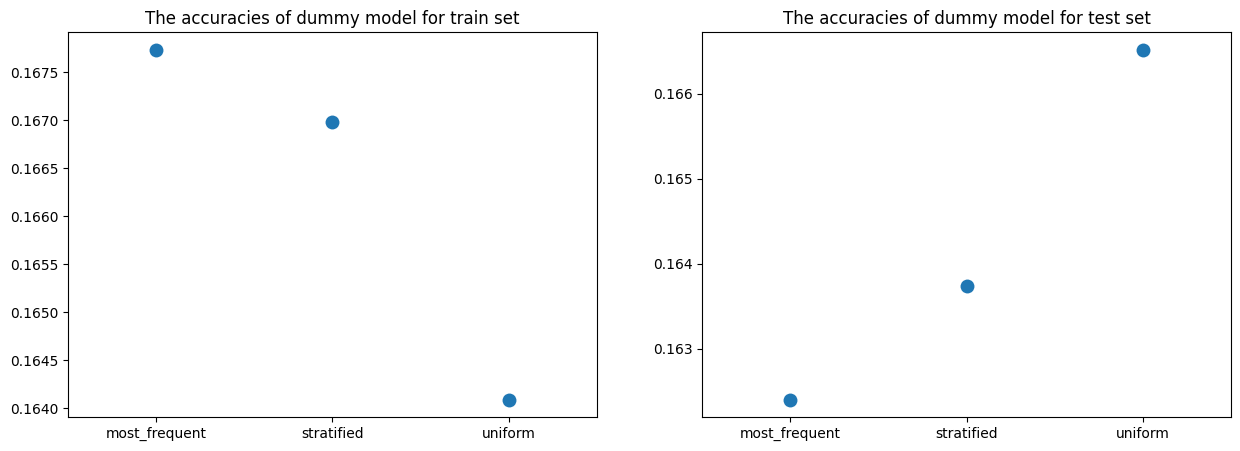

In [52]:
f, axes = plt.subplots(1,2, figsize = (15,5))
sns.stripplot(x=strategies, y=train_dummy_scores,size = 10, ax = axes[0])
axes[0].set_title("The accuracies of dummy model for train set")
sns.stripplot(x=strategies, y=test_dummy_scores,size = 10, ax = axes[1])
axes[1].set_title("The accuracies of dummy model for test set")
plt.show()

# **Models evaluation using different metrics**

In [53]:
knn = KNeighborsClassifier(n_neighbors = 22, weights = 'distance', algorithm = 'ball_tree')
randomForest = RandomForestClassifier(n_estimators=119, max_features='sqrt', max_depth=15, min_samples_split=5, min_samples_leaf=10)
svc = LinearSVC(C=0.13022969239595297)
xgb = XGBClassifier(reg_alpha=0.5, gamma=0.1, n_estimators=95, max_depth=8, learning_rate=0.04989968022036783, subsample=0.6713114776225965, colsample_bytree=0.5096762376471592)
abc = AdaBoostClassifier(n_estimators=160, learning_rate=0.30007391716763326)
classifiers = [knn, svc, xgb, abc, randomForest]
Clf_names = ["knn", "linearSvc", "xgb", "abc", "randomForest"]

In [54]:
tune_train_scores = []
tune_test_scores = []
count = 0
for i in classifiers:
  i.fit(X_train_downsampled, y_train_downsampled)
  y_pred_train_tune = i.predict(X_train_downsampled)
  y_pred_test_tune = i.predict(X_test_downsampled)
  print(f"The train Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_train_downsampled, y_pred = y_pred_train_tune))
  print(f"The test Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_test_downsampled, y_pred = y_pred_test_tune))
  print()
  tune_train_scores.append(metrics.accuracy_score(y_true = y_train_downsampled, y_pred = y_pred_train_tune))
  tune_test_scores.append(metrics.accuracy_score(y_true = y_test_downsampled, y_pred = y_pred_test_tune))
  count = count+1

The train Accuracy for knn model is: 0.9711399309807414
The test Accuracy for knn model is: 0.4182991985752449

The train Accuracy for linearSvc model is: 0.4482355560503173
The test Accuracy for linearSvc model is: 0.43755565449688333

The train Accuracy for xgb model is: 0.820939552488033
The test Accuracy for xgb model is: 0.4693900267141585

The train Accuracy for abc model is: 0.27332183012356676
The test Accuracy for abc model is: 0.2717052537845058

The train Accuracy for randomForest model is: 0.8465156406545697
The test Accuracy for randomForest model is: 0.4514692787177204



In [55]:
count = 0
for classifier in classifiers:
  prediction = classifier.predict(X_test_downsampled)
  print(f"Classification report for {Clf_names[count]} model is:", classification_report(y_test_downsampled, prediction))
  count = count+1

Classification report for knn model is:               precision    recall  f1-score   support

           0       0.43      0.37      0.40      1459
           1       0.41      0.38      0.40      1492
           2       0.42      0.56      0.48      1490
           3       0.45      0.43      0.44      1531
           4       0.39      0.33      0.36      1552
           5       0.40      0.44      0.42      1460

    accuracy                           0.42      8984
   macro avg       0.42      0.42      0.42      8984
weighted avg       0.42      0.42      0.42      8984

Classification report for linearSvc model is:               precision    recall  f1-score   support

           0       0.43      0.38      0.40      1459
           1       0.40      0.52      0.45      1492
           2       0.47      0.56      0.51      1490
           3       0.45      0.37      0.41      1531
           4       0.45      0.38      0.41      1552
           5       0.43      0.42      0.42   

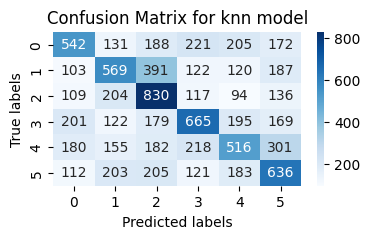

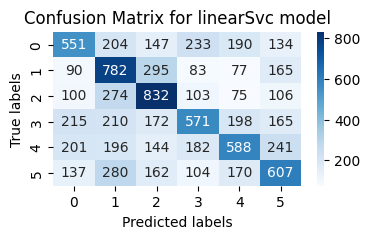

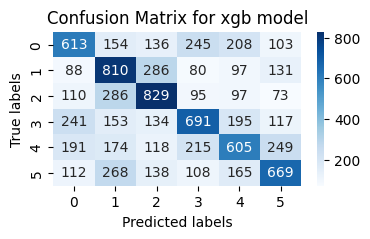

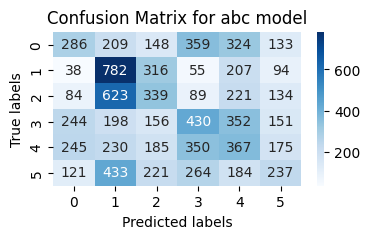

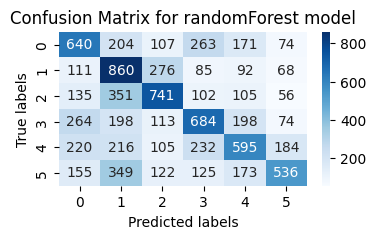

In [56]:
count = 0
for classifier in classifiers:
  if i == svc:
    count = count+1
    continue
  prediction = classifier.predict(X_test_downsampled)
  cm = confusion_matrix(y_test_downsampled, prediction)
  plt.figure(figsize=(4, 2))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title(f"Confusion Matrix for {Clf_names[count]} model")
  plt.show()
  count = count+1

# Implement CNN using self embedding

In [57]:

vocab_size = 10000
embedding_dim = 100
max_length = 100
trunc_type = 'post'
padding_type = 'post'

# tokenize and pad
tokenizer = Tokenizer(num_words=vocab_size, oov_token='')
tokenizer.fit_on_texts(df_downsampled['text'])
sequences = tokenizer.texts_to_sequences(df_downsampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df_downsampled['label'], test_size=0.2, random_state=42)


model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/20
1123/1123 - 42s - 37ms/step - accuracy: 0.8290 - loss: 0.4429 - val_accuracy: 0.9320 - val_loss: 0.1725
Epoch 2/20
1123/1123 - 46s - 41ms/step - accuracy: 0.9452 - loss: 0.1397 - val_accuracy: 0.9329 - val_loss: 0.1800
Epoch 3/20
1123/1123 - 77s - 68ms/step - accuracy: 0.9593 - loss: 0.1008 - val_accuracy: 0.9160 - val_loss: 0.2204
Epoch 4/20
1123/1123 - 41s - 36ms/step - accuracy: 0.9699 - loss: 0.0767 - val_accuracy: 0.9202 - val_loss: 0.2389
Epoch 5/20
1123/1123 - 43s - 38ms/step - accuracy: 0.9758 - loss: 0.0638 - val_accuracy: 0.9183 - val_loss: 0.2484
Epoch 6/20
1123/1123 - 41s - 37ms/step - accuracy: 0.9786 - loss: 0.0545 - val_accuracy: 0.9136 - val_loss: 0.2760
Epoch 7/20
1123/1123 - 41s - 36ms/step - accuracy: 0.9812 - loss: 0.0485 - val_accuracy: 0.9102 - val_loss: 0.2951
Epoch 8/20
1123/1123 - 39s - 34ms/step - accuracy: 0.9812 - loss: 0.0459 - val_accuracy: 0.9138 - val_loss: 0.3161
Epoch 9/20
1123/1123 - 41s - 37ms/step - accuracy: 0.9833 - loss: 0.0392 - val_a

# Comparing with existing methods (people in kaggle that also tried this dataset)

In [58]:
emotion_to_sentiment_3labels = {
    0: 0,  # sadness -> negative sentiment
    1: 1,  # joy/love -> neutral sentiment
    2: 1,
    3: 0,  # anger -> negative sentiment
    4: 2,  # fear/surprise -> positive sentiment
    5: 2   # fear/surprise -> positive sentiment
}

df_compare = df_downsampled_preprocessed.copy()
df_compare['label'] = df_compare['label'].map(emotion_to_sentiment_3labels)

df_compare.head()

,Unnamed: 0,text,label,text_length,sentiment,tokenized_text,text_no_stopwords,stemmed_text,text_embedding,sentence_stemmed_text
0,84526,i feel shaken up and torn down,2,30,-0.155556,"[i, feel, shaken, up, and, torn, down]","[shaken, torn]","[shaken, torn]","[-0.533135, 0.509355, 0.160105, -0.267755, -0....","shaken,torn"
1,227655,on reperbahn,0,12,0.000000,"[on, reperbahn]",[reperbahn],[reperbahn],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",reperbahn
2,339603,i feel insulted that he doesnt know me better ...,0,55,0.500000,"[i, feel, insulted, that, he, doesnt, know, me...","[insulted, doesnt, better]","[insult, doesnt, better]","[-0.14870433333333333, 0.30715000000000003, 0....","insult,doesnt,better"
3,281246,i imagine that my fellow liberals get the same...,0,150,0.183333,"[i, imagine, that, my, fellow, liberals, get, ...","[imagine, fellow, liberals, warm, feelings, re...","[imagin, fellow, liber, warm, feel, read, mess...","[-0.20008642857142855, 0.3273742857142857, 0.1...","imagin,fellow,liber,warm,feel,read,messag,cons..."
4,192230,i dont know why im writing it here and not tel...,0,131,0.000000,"[i, dont, know, why, im, writing, it, here, an...","[dont, writing, telling, bet, theyre, totally,...","[dont, write, tell, bet, theyr, total, unawar,...","[-0.027195619999999997, 0.16288940000000002, 0...","dont,write,tell,bet,theyr,total,unawar,dissatisfi"


In [59]:
X_train_comapre, X_test_compare, y_train_compare, y_test_compare = split_data(df_compare)

In [60]:
tune_train_scores = []
tune_test_scores = []
count = 0
for i in classifiers:
  i.fit(X_train_comapre, y_train_compare)
  y_pred_train_tune = i.predict(X_train_comapre)
  y_pred_test_tune = i.predict(X_test_compare)
  print(f"The train Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_train_compare, y_pred = y_pred_train_tune))
  print(f"The test Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_test_compare, y_pred = y_pred_test_tune))
  print()
  tune_train_scores.append(metrics.accuracy_score(y_true = y_train_compare, y_pred = y_pred_train_tune))
  tune_test_scores.append(metrics.accuracy_score(y_true = y_test_compare, y_pred = y_pred_test_tune))
  count = count+1

The train Accuracy for knn model is: 0.9843315150840476
The test Accuracy for knn model is: 0.5894924309884239

The train Accuracy for linearSvc model is: 0.6039185127462986
The test Accuracy for linearSvc model is: 0.5977292965271594

The train Accuracy for xgb model is: 0.8409495714126684
The test Accuracy for xgb model is: 0.6380231522707035

The train Accuracy for abc model is: 0.5001669820772571
The test Accuracy for abc model is: 0.5

The train Accuracy for randomForest model is: 0.883975286652566
The test Accuracy for randomForest model is: 0.6147595725734639



# Trying different techniques for embedding

In [61]:
stemer = PorterStemmer()
stp_words = stopwords.words("english")
def preprocess(text):
    preprocessed_txt = ""
    tokens = word_tokenize(text)
    for token in tokens:
        if token not in stp_words :
            lower_token = token.lower()
            stemed_token = stemer.stem(lower_token)
            preprocessed_txt += stemed_token + " "
    else:
        preprocessed_txt = preprocessed_txt[:-1]
    return preprocessed_txt

Number of data for each class is: 7486


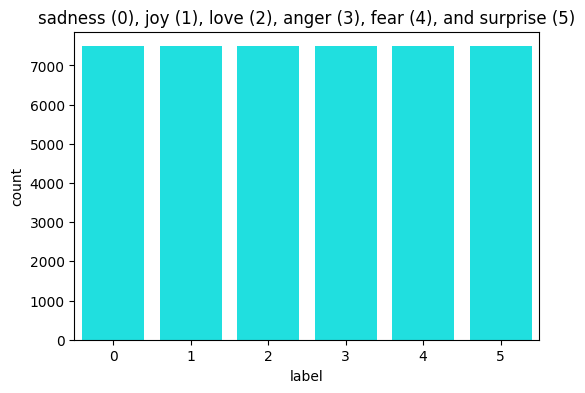

,Unnamed: 0,text,label
0,84526,i feel shaken up and torn down,4
1,227655,on reperbahn,3
2,339603,i feel insulted that he doesnt know me better ...,3
3,281246,i imagine that my fellow liberals get the same...,3
4,192230,i dont know why im writing it here and not tel...,3


In [62]:
# now we will apply undersampling to the majority class to match class 5

# Separate the dataset by class
df_0 = original_df[original_df['label'] == 0]
df_1 = original_df[original_df['label'] == 1]
df_2 = original_df[original_df['label'] == 2]
df_3 = original_df[original_df['label'] == 3]
df_4 = original_df[original_df['label'] == 4]
df_5 = original_df[original_df['label'] == 5]

# saving the amount of data in label 5
n_samples_label_5 = round(len(df_5) / 2)

df_0_downsampled = resample(df_0, replace=False, n_samples=n_samples_label_5, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=n_samples_label_5, random_state=42)
df_2_downsampled = resample(df_2, replace=False, n_samples=n_samples_label_5, random_state=42)
df_3_downsampled = resample(df_3, replace=False, n_samples=n_samples_label_5, random_state=42)
df_4_downsampled = resample(df_4, replace=False, n_samples=n_samples_label_5, random_state=42)
df_5_downsampled = resample(df_5, replace=False, n_samples=n_samples_label_5, random_state=42)

df_downsampled_second = pd.concat([df_1_downsampled, df_0_downsampled, df_3_downsampled, df_4_downsampled, df_2_downsampled, df_5_downsampled])

df_downsampled_second = df_downsampled_second.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Number of data for each class is: {n_samples_label_5}")
classes_plot(df_downsampled_second)
df_downsampled_second.head()

In [63]:

df_downsampled_second.head()

,Unnamed: 0,text,label
0,84526,i feel shaken up and torn down,4
1,227655,on reperbahn,3
2,339603,i feel insulted that he doesnt know me better ...,3
3,281246,i imagine that my fellow liberals get the same...,3
4,192230,i dont know why im writing it here and not tel...,3


In [64]:
df_downsampled_second['text'] = df_downsampled_second['text'].apply(preprocess)

In [65]:
count_vectorizer = CountVectorizer(binary=True, stop_words='english')
X = count_vectorizer.fit_transform(df_downsampled_second['text'])

In [66]:
features = count_vectorizer.get_feature_names_out()


In [67]:
y = df_downsampled_second['label']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [69]:
knn = KNeighborsClassifier(n_neighbors = 22, weights = 'distance', algorithm = 'ball_tree')
randomForest = RandomForestClassifier(n_estimators=119, max_features='sqrt', max_depth=15, min_samples_split=5, min_samples_leaf=10)
svc = LinearSVC(C=0.13022969239595297)
xgb = XGBClassifier(reg_lambda=1.0, reg_alpha=0.5, gamma=0.1, n_estimators=95, max_depth=8, learning_rate=0.04989968022036783, subsample=0.6713114776225965, colsample_bytree=0.5096762376471592)
abc = AdaBoostClassifier(n_estimators=160, learning_rate=0.30007391716763326)
classifiers = [knn, svc, xgb, abc, randomForest]
Clf_names = ["knn", "linearSvc", "xgb", "abc", "randomForest"]

In [70]:
tune_train_scores = []
tune_test_scores = []
count = 0
for i in classifiers:
  i.fit(X_train, y_train)
  y_pred_train_tune = i.predict(X_train)
  y_pred_test_tune = i.predict(X_test)
  print(f"The train Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train_tune))
  print(f"The test Accuracy for {Clf_names[count]} model is:", metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test_tune))
  print()
  tune_train_scores.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train_tune))
  tune_test_scores.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred_test_tune))
  count = count+1


The train Accuracy for knn model is: 0.9907763747972392
The test Accuracy for knn model is: 0.7571057513914656

The train Accuracy for linearSvc model is: 0.9432906078050952
The test Accuracy for linearSvc model is: 0.8837105751391465

The train Accuracy for xgb model is: 0.8638402086447632
The test Accuracy for xgb model is: 0.8557328385899814

The train Accuracy for abc model is: 0.24191342514551065
The test Accuracy for abc model is: 0.23918367346938776

The train Accuracy for randomForest model is: 0.8542667217963805
The test Accuracy for randomForest model is: 0.8515027829313544



# Tranformer work

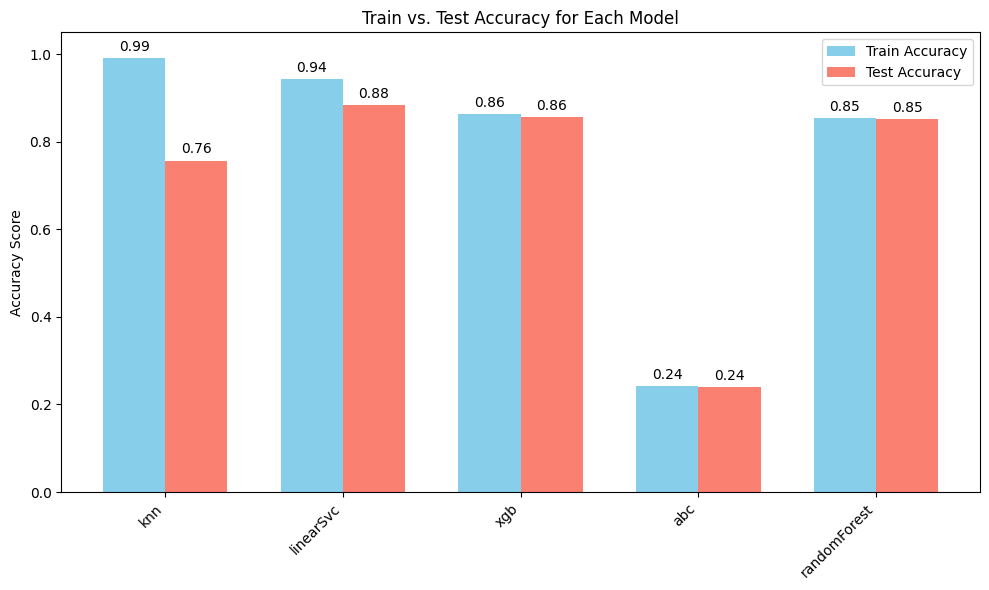

In [71]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(Clf_names))  # מספר המודלים
width = 0.35  # רוחב העמודה

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, tune_train_scores, width, label='Train Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, tune_test_scores, width, label='Test Accuracy', color='salmon')

# כותרות וצירים
ax.set_ylabel('Accuracy Score')
ax.set_title('Train vs. Test Accuracy for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(Clf_names, rotation=45, ha='right')
ax.set_ylim(0, 1.05)
ax.legend()

# הוספת הערכים מעל העמודות
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # סטייה קטנה למעלה
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
